# Machine Learning Pipeline - Data Analysis


===================================================================================================

## Predicción de Clientes que acepten un PLD del Banco Banbuf

El objetivo del proyecto es construir un modelo de aprendizaje automático para clasificar a los que acepten un Prestamo de Libre Disposición por medio de una gestión de Call Center


### ¿Por qué es esto importante?

Predecir qué clientes aceptarán un PLD permite optimizar los recursos del Call Center, priorizando la gestión en clientes con mayor probabilidad de conversión. Esto mejora la eficiencia operativa y la rentabilidad del banco.


### ¿Cuál es el objetivo del modelo de aprendizaje automático?

Nuestro objetivo es clasificar correctamente a los clientes que aceptarán el PLD, maximizando la precisión y minimizando falsos positivos y falsos negativos.

Usaremos métricas de clasificación como:

- F1-score: Para equilibrar precisión y recall en un dataset posiblemente desbalanceado.
- AUC-ROC: Para evaluar la capacidad del modelo de distinguir entre clientes que aceptan y los que no.
- Accuracy y Recall: Para medir la tasa de aciertos generales y la capacidad del modelo de capturar clientes interesados en el préstamo.


### ¿Cómo descargo el conjunto de datos?

*pendiente*



# Data Analysis

Vamos a proceder a cargar el conjunto de datos.

In [209]:
# para manejar conjuntos de datos
import pandas as pd
import numpy as np

# para ploteo
import matplotlib.pyplot as plt
import seaborn as sns

# para la yeo-johnson transformation
import scipy.stats as stats

# para mostrar todas las columnas del dataframe en el cuaderno
pd.pandas.set_option('display.max_columns', None)

In [ ]:
#pip install pyarrow fastparquet


In [210]:
data = pd.read_parquet('../data_full_raw.parquet')
# filas y columnas del dataset
print(data.shape)

# visualise the dataset
data.head()

(856608, 71)


,DNI,BASE,CELULAR1,CELULAR2,CELULAR3,12M_MONTO,12M_TASA,18M_MONTO,18M_TASA,24M_MONTO,24M_TASA,36M_MONTO,36M_TASA,EDAD,MARCA_LABORAL,DEPARTAMENTO,PROVINCIA,DISTRITO_INEI,LIMAS,PROPENSION,PLD_NACION,PLD_BCP,PLD_BBVA,PLD_SAGA,PLD_SCOTIA,PLD_C_HUANCAYO,PLD_CREDISCOTIA,PLD_INTERBANK,PLD_C_AREQUIPA,PLD_C_CUSCO,PLD_MIBANCO,PLD_RIPLEY,PLD_C_PIURA,PLD_EFECTIVA,PLD_PICHINCHA,PLD_CONFIANZA,TC_BCP,TC_SAGA,TC_INTERBANK,TC_BBVA,TC_OH,TC_RIPLEY,TC_SCOTIA,TC_CREDISCOTIA,TC_PICHINCHA,TC_CENCOSUD,MENSAJE_TASA,COMPETITIVIDAD,PRINCIPALIDAD_CONSUMO,MENSAJE_VARIACION,ULTIMA_AGRUPACION,ULTIMO_RESULTADO,ULTIMO_MOTIVO,RANGO_RCI,ESTADO_CIVIL,GENERO,veces_acepto_producto,tiempo_desde_ultima_conversion,tiempo_desde_ultima_negacion,intentos_totales,meses_gestionados,dias_ultima_gestion,ultima_gestion,veces_sin_respuesta,veces_solicitud_seguimiento,promedio_dias_entre_gestiones,max_intentos_en_un_mes,veces_respuesta_positiva,veces_respuesta_negativa,_merge_variables,target
0,0,2025_01,944256646,941892836,None,7400.0,0.799,8700.0,0.799,8700.0,0.799,8700.0,0.799,38.0,2.DEPEN+INDEPEN,LIMA,LIMA,LOS OLIVOS,LIMA NORTE,PROPENSION 2,0.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO APLICA A EXCEPCION DE TASA,OFERTA MAYOR A ALGUNA DEUDA,DEUDA EN BANCOS GRANDES,NUEVA OFERTA,NO CONTACTO,VOLVER A INTENTAR,BUZON,"1. <0%,10%>",Casado,M,NaN,NaN,NaN,NaN,NaN,NaN,NO GESTIONADO,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1,2025_01,952918805,952918808,967905361,9900.0,0.780,13100.0,0.780,15500.0,0.780,18600.0,0.780,62.0,4.INFORMAL,LAMBAYEQUE,FERREÑAFE,FERREÑAFE,FUERA DE LIMA,PROPENSION 1,20998.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1718.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272.0,0.0,0.0,0.0,0.0,NO APLICA A EXCEPCION DE TASA,OFERTA MAYOR A ALGUNA DEUDA,DEUDA EN BANCOS MEDIANOS,CON MAS OFERTA Y MENOS TASA,NO CONTACTO,NO CONTACTO MAQUINA,Contestador/Fax,"3. [20%,30%>",Casado,M,0.0,NaN,4.0,240.0,1.0,1.0,NO CONTACTO,228.0,0.0,0.0,240.0,0.0,12.0,1.0,0.0
2,2,2025_01,954651500,954651840,None,6900.0,0.650,9300.0,0.650,11200.0,0.650,11900.0,0.650,49.0,3.INDEPENDIENTE,CALLAO,CALLAO,BELLAVISTA,CALLAO,PROPENSION 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1627.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153.0,NO APLICA A EXCEPCION DE TASA,OFERTA MAYOR A ALGUNA DEUDA,DEUDA EN BANCOS MEDIANOS,MISMA OFERTA Y MAS TASA,NO CONTACTO,VOLVER A INTENTAR,SE CORTA LLAMADA SIN MOTIVO,"2. [10%,20%>",Soltero,F,0.0,NaN,2.0,41.0,1.0,0.0,CONTACTO NO EFECTIVO,31.0,0.0,0.0,41.0,0.0,10.0,1.0,0.0
3,3,2025_01,986354919,942159204,None,4000.0,0.650,5400.0,0.650,6500.0,0.650,8000.0,0.650,48.0,2.DEPEN+INDEPEN,ANCASH,SANTA,NUEVO CHIMBOTE,FUERA DE LIMA,PROPENSION 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO APLICA A EXCEPCION DE TASA,None,SIN DEUDA CONSUMO,MENOS OFERTA Y MISMA TASA,NO CONTACTO,NO CONTACTO MAQUINA,Comunica,"4. [30%,60%]",Casado,M,NaN,NaN,NaN,NaN,NaN,NaN,NO GESTIONADO,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,4,2025_01,None,None,None,4200.0,0.799,5500.0,0.799,5500.0,0.799,5500.0,0.799,52.0,4.INFORMAL,ANCASH,HUARAZ,HUARAZ,FUERA DE LIMA,PROPENSION 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO APLICA A EXCEPCION DE TASA,None,SIN DEUDA CONSUMO,MISMA OFERTA Y MISMA TASA,CONTACTO NO EFECTIVO,NEGATIVO,SIN REBATE - NO INTERESADO CORTA LLAMADA,"1. <0%,10%>",Casado,M,0.0,NaN,17.0,69.0,2.0,5.0,CONTACTO NO EFECTIVO,59.0,0.0,0.0,55.0,0.0,6.0,1.0,0.0


In [211]:
data_train = data[data["BASE"]!='2025_01'].reset_index(drop=True)
data_test = data[data["BASE"]=='2025_01'].reset_index(drop=True)

In [214]:
data_train.to_parquet('../data/train.parquet')
data_test.to_parquet('../data/test.parquet')

In [215]:
data = data_train.copy()

In [216]:
bancos_comerciales_pld = ["PLD_BCP", "PLD_BBVA", "PLD_SCOTIA", "PLD_INTERBANK", "PLD_PICHINCHA","PLD_NACION"]
bancos_comerciales_tc = ["TC_BCP", "TC_BBVA", "TC_SCOTIA", "TC_INTERBANK", "TC_PICHINCHA"]

cajas_ahorro_pld = ["PLD_C_HUANCAYO", "PLD_C_AREQUIPA", "PLD_C_CUSCO", "PLD_C_PIURA", "PLD_EFECTIVA", "PLD_CONFIANZA"]
cajas_ahorro_tc = []  # No hay TC en cajas de ahorro

retail_financieras_pld = ["PLD_SAGA", "PLD_RIPLEY", "PLD_CREDISCOTIA", "PLD_MIBANCO"]
retail_financieras_tc = ["TC_SAGA", "TC_RIPLEY", "TC_CENCOSUD", "TC_OH", "TC_CREDISCOTIA"]

pld_columns = bancos_comerciales_pld + cajas_ahorro_pld + retail_financieras_pld
tc_columns = bancos_comerciales_tc + cajas_ahorro_tc + retail_financieras_tc

col_drop = tc_columns + pld_columns


In [217]:
# Calcular total de deuda y cantidad de entidades con deuda distinta de 0
data["Bancos_PLD_Total"] = data[bancos_comerciales_pld].sum(axis=1)
data["Cajas_PLD_Total"] = data[cajas_ahorro_pld].sum(axis=1)
data["Retail_PLD_Total"] = data[retail_financieras_pld].sum(axis=1)
data["PLD_Total"] = data[pld_columns].sum(axis=1)

data["Bancos_TC_Total"] = data[bancos_comerciales_tc].sum(axis=1)
data["Retail_TC_Total"] = data[retail_financieras_tc].sum(axis=1)
data["TC_Total"] = data[tc_columns].sum(axis=1)


data["Bancos_PLD_Entidades"] = (data[bancos_comerciales_pld] != 0).sum(axis=1)
data["Cajas_PLD_Entidades"] = (data[cajas_ahorro_pld] != 0).sum(axis=1)
data["Retail_PLD_Entidades"] = (data[retail_financieras_pld] != 0).sum(axis=1)
data["PLD_Entidades"] = (data[pld_columns] != 0).sum(axis=1)


data["Bancos_TC_Entidades"] = (data[bancos_comerciales_tc] != 0).sum(axis=1)
data["Retail_TC_Entidades"] = (data[retail_financieras_tc] != 0).sum(axis=1)
data["TC_Entidades"] = (data[tc_columns] != 0).sum(axis=1)


data.drop(columns = col_drop , inplace=True)

In [218]:
data["CANTIDAD_CELULARES"]=data[[x for x in data.columns if "CEL" in x]].notna().sum(axis=1)

In [219]:
data = data[data.BASE.isin(sorted(data.BASE.unique())[-3:])]

In [220]:
# Eliminamos Id, ya que es solo un numero para identificar cada casa
data.drop(["DNI","BASE","CELULAR1","CELULAR2","CELULAR3"], axis=1, inplace=True)

data.shape

(211500, 55)

In [221]:
data["TC_Entidades_Mas3"] = data.TC_Entidades.map( lambda x : 1 if x > 3 else 0)
data["Tiene_Deuda_PLD"] = data.PLD_Entidades.map( lambda x : 1 if x > 0 else 0)


In [222]:
data.head(2)

,12M_MONTO,12M_TASA,18M_MONTO,18M_TASA,24M_MONTO,24M_TASA,36M_MONTO,36M_TASA,EDAD,MARCA_LABORAL,DEPARTAMENTO,PROVINCIA,DISTRITO_INEI,LIMAS,PROPENSION,MENSAJE_TASA,COMPETITIVIDAD,PRINCIPALIDAD_CONSUMO,MENSAJE_VARIACION,ULTIMA_AGRUPACION,ULTIMO_RESULTADO,ULTIMO_MOTIVO,RANGO_RCI,ESTADO_CIVIL,GENERO,veces_acepto_producto,tiempo_desde_ultima_conversion,tiempo_desde_ultima_negacion,intentos_totales,meses_gestionados,dias_ultima_gestion,ultima_gestion,veces_sin_respuesta,veces_solicitud_seguimiento,promedio_dias_entre_gestiones,max_intentos_en_un_mes,veces_respuesta_positiva,veces_respuesta_negativa,_merge_variables,target,Bancos_PLD_Total,Cajas_PLD_Total,Retail_PLD_Total,PLD_Total,Bancos_TC_Total,Retail_TC_Total,TC_Total,Bancos_PLD_Entidades,Cajas_PLD_Entidades,Retail_PLD_Entidades,PLD_Entidades,Bancos_TC_Entidades,Retail_TC_Entidades,TC_Entidades,CANTIDAD_CELULARES,TC_Entidades_Mas3,Tiene_Deuda_PLD
555108,8900.0,0.740,10100.0,0.740,10100.0,0.740,10100.0,0.740,36.0,2.DEPEN+INDEPEN,LIMA,LIMA,LOS OLIVOS,LIMA NORTE,PROPENSION 2,NO APLICA A EXCEPCION DE TASA,OFERTA MAYOR A ALGUNA DEUDA,DEUDA EN BANCOS GRANDES,MISMA OFERTA,NO CONTACTO,NO CONTACTO MAQUINA,Contestador/Fax,"1. <0%,10%>",Soltero,F,NaN,NaN,NaN,NaN,NaN,NaN,NO GESTIONADO,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,314.0,0.0,314.0,0,0,0,0,1,0,1,1,0,0
555109,8800.0,0.799,11000.0,0.799,11000.0,0.799,11000.0,0.799,36.0,2.DEPEN+INDEPEN,LIMA,LIMA,BREÑA,LIMA CENTRO,PROPENSION 2,NO APLICA A EXCEPCION DE TASA,OFERTA MAYOR A ALGUNA DEUDA,DEUDA EN BANCOS GRANDES,CON MAS OFERTA,NO CONTACTO,NO CONTACTO MAQUINA,Contestador/Fax,"1. <0%,10%>",Soltero,F,0.0,NaN,NaN,10.0,1.0,33.0,NO CONTACTO,10.0,0.0,1.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,424.0,0.0,424.0,0,0,0,0,1,0,1,1,0,0


El conjunto de datos de precios de casas contiene 1460 filas, es decir, casas, y 80 columnas, es decir, variables.

79 son variables predictivas y 1 es la variable objetivo: SalePrice

## Analysis

**Analizaremos lo siguiente:**

1. La variable objetivo (The target variable)
2. Tipos de variables (categóricas y numéricas)
3. Datos faltantes (Missing data)
4. Variables numéricas
    - Discretas
    - Continuas
    - Distribuciones
    - Transformaciones

5. Variables Categóricas
    - Cardinalidad
    - Etiquetas Raras
    - Mapeos Especiales
    
6. Recursos adicionales de Lectura

## Target

Comencemos explorando la distribución del objetivo.

Observamos que esta está extremadamente desbalanceada

In [223]:
data["target"].value_counts()

target
0.0    210940
1.0       560
Name: count, dtype: int64

In [28]:
data["target"].value_counts(normalize=True)

target
0.0    0.997352
1.0    0.002648
Name: proportion, dtype: float64

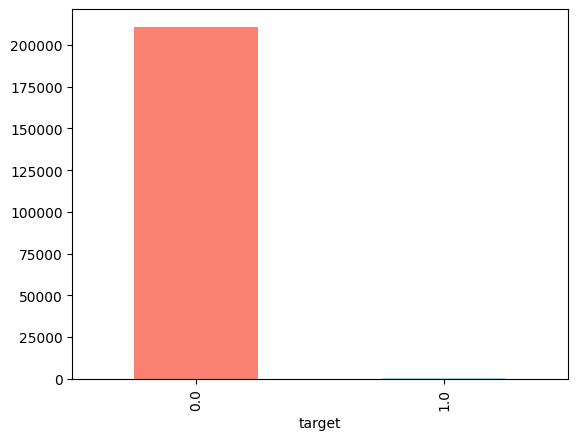

In [225]:
data["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

## Variable Types

A continuación, identifiquemos las variables categóricas y numéricas.

In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211500 entries, 555108 to 766607
Data columns (total 57 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   12M_MONTO                       211500 non-null  float64
 1   12M_TASA                        211500 non-null  float64
 2   18M_MONTO                       211500 non-null  float64
 3   18M_TASA                        211500 non-null  float64
 4   24M_MONTO                       211500 non-null  float64
 5   24M_TASA                        211500 non-null  float64
 6   36M_MONTO                       211500 non-null  float64
 7   36M_TASA                        211500 non-null  float64
 8   EDAD                            211500 non-null  float64
 9   MARCA_LABORAL                   211500 non-null  object 
 10  DEPARTAMENTO                    211500 non-null  object 
 11  PROVINCIA                       211500 non-null  object 
 12  DISTRITO_INEI   

In [228]:
# identifiquemos las variables categóricas
# capturaremos aquellas de tipo *object*

cat_vars = [var for var in data.columns if data[var].dtype == 'O']

# agreguemos MSSubClass a la lista de variables categóricas
len(cat_vars)

17

In [229]:
[var for var in data.columns if data[var].dtype == 'O']

['MARCA_LABORAL',
 'DEPARTAMENTO',
 'PROVINCIA',
 'DISTRITO_INEI',
 'LIMAS',
 'PROPENSION',
 'MENSAJE_TASA',
 'COMPETITIVIDAD',
 'PRINCIPALIDAD_CONSUMO',
 'MENSAJE_VARIACION',
 'ULTIMA_AGRUPACION',
 'ULTIMO_RESULTADO',
 'ULTIMO_MOTIVO',
 'RANGO_RCI',
 'ESTADO_CIVIL',
 'GENERO',
 'ultima_gestion']

In [230]:
# ahora identifiquemos las variables numéricas

num_vars = [
    var for var in data.columns if var not in cat_vars 
]

# Numero de Variables Categóricas
len(num_vars)

40

# Missing values

Let's go ahead and find out which variables of the dataset contain missing values.

In [231]:
# Hacemos una lista de las variables que contienen Missing Values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determina el porcentaje de missing values (expresado en decimales)
# y muestra el resultado ordenado por % de Missing Data

data[vars_with_na].isnull().mean().sort_values(ascending=False)

tiempo_desde_ultima_conversion    0.999948
tiempo_desde_ultima_negacion      0.920988
intentos_totales                  0.666619
dias_ultima_gestion               0.666619
veces_respuesta_positiva          0.666619
max_intentos_en_un_mes            0.666619
promedio_dias_entre_gestiones     0.666619
veces_solicitud_seguimiento       0.666619
veces_sin_respuesta               0.666619
veces_respuesta_negativa          0.666619
meses_gestionados                 0.666619
veces_acepto_producto             0.666619
COMPETITIVIDAD                    0.529154
ULTIMA_AGRUPACION                 0.232563
ULTIMO_MOTIVO                     0.232563
ULTIMO_RESULTADO                  0.232563
GENERO                            0.000095
dtype: float64

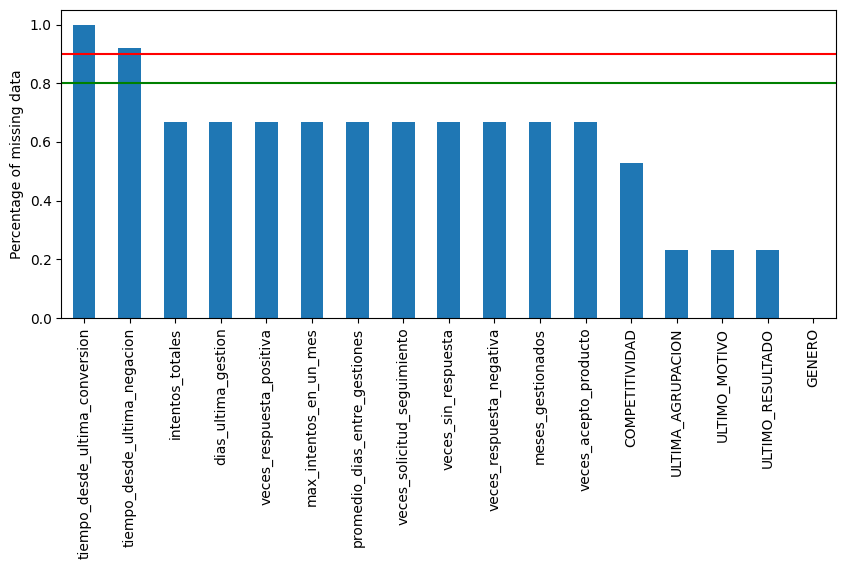

In [232]:
# plot
data[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

In [233]:
# Ahora podemos determinar cuáles variables, de aquellas con datos faltantes,
# son numéricas y cuáles son categóricas

cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Numero de Variables Categóricas con na: ', len(cat_na))
print('Numero de Variables Numéricas con na: ', len(num_na))

Numero de Variables Categóricas con na:  5
Numero de Variables Numéricas con na:  12


In [234]:
len(cat_vars)

17

## Relación entre los Missing Values y la Aceptación del Producto
Evaluemos la aceptación en aquellas observaciones donde falta información. Haremos esto para cada variable que muestre datos faltantes.

In [235]:
def analyse_na_value(df, var):
    df = df.copy()

    # Crear una variable que indica si el valor está ausente (1) o presente (0)
    df[var] = np.where(df[var].isnull(), "Nulo", "No Nulo")

    # Crear subgráficos con ejes Y compartidos
    fig, ax = plt.subplots(1, 2, figsize=(8,2), sharey=True)  # Compartir el eje Y

    df[df["target"] == 0].sort_values(var)[var].value_counts(normalize=True,sort=False).plot(kind="bar", ax=ax[0], color="red", alpha=0.7)
    ax[0].set_title("Distribución en No Aceptan")

    df[df["target"] == 1].sort_values(var)[var].value_counts(normalize=True,sort=False).plot(kind="bar", ax=ax[1], color="green", alpha=0.7)
    ax[1].set_title("Distribución en Aceptan")

    plt.show()


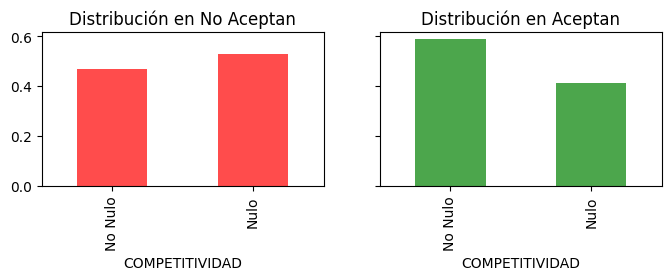

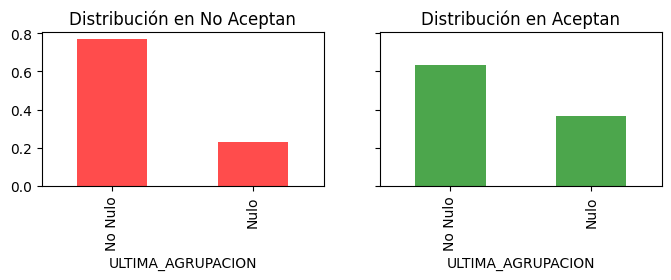

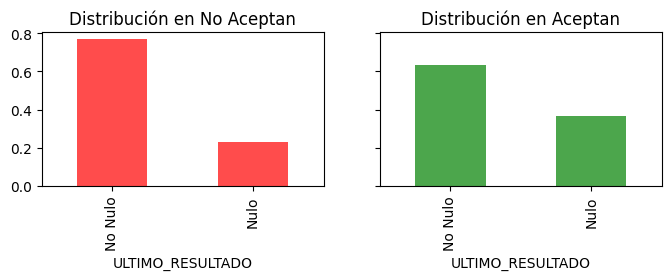

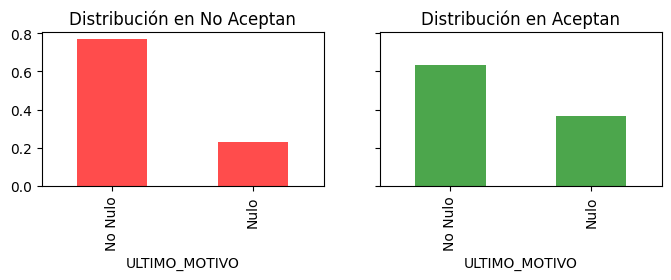

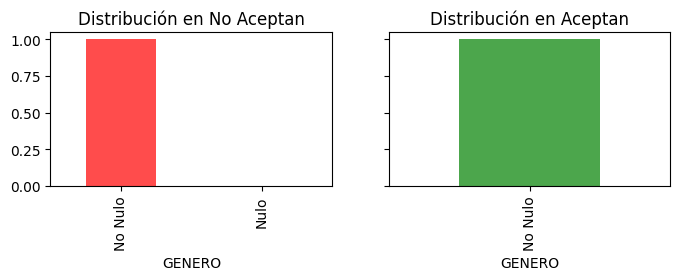

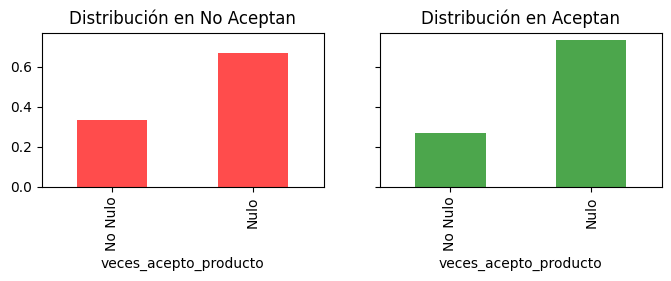

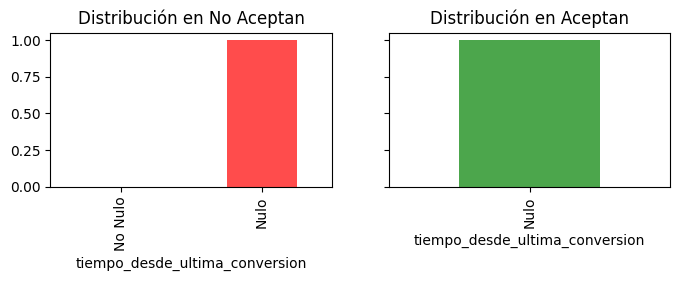

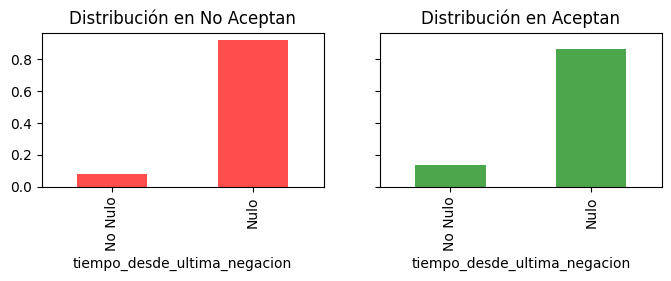

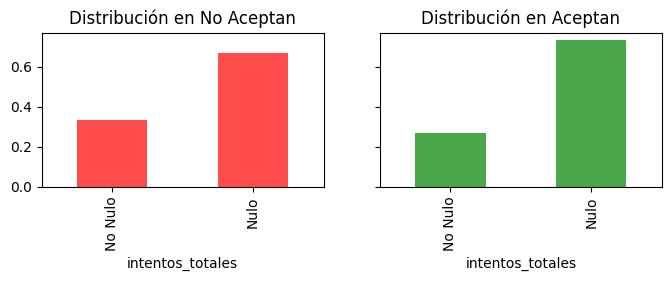

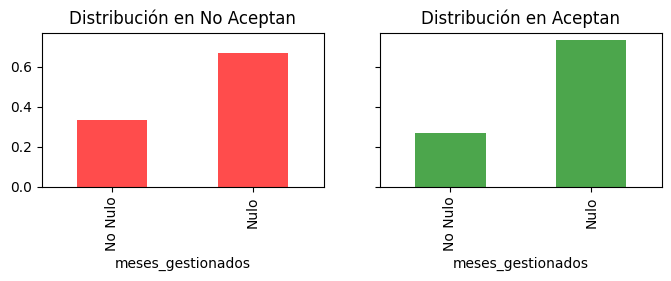

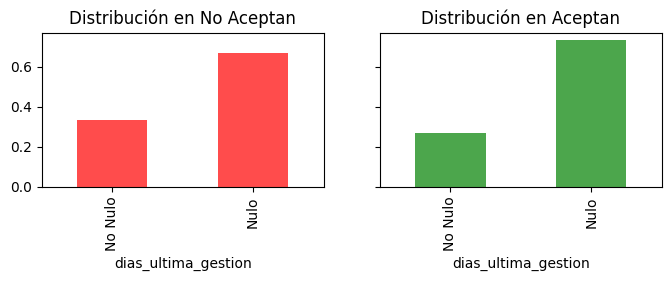

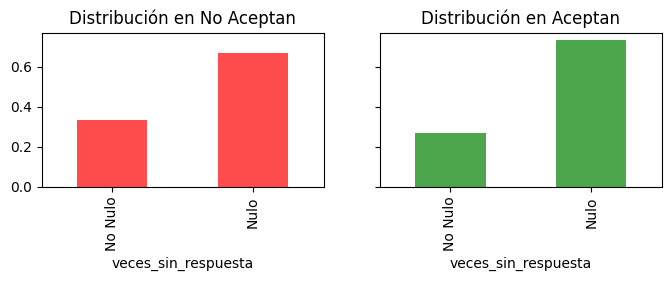

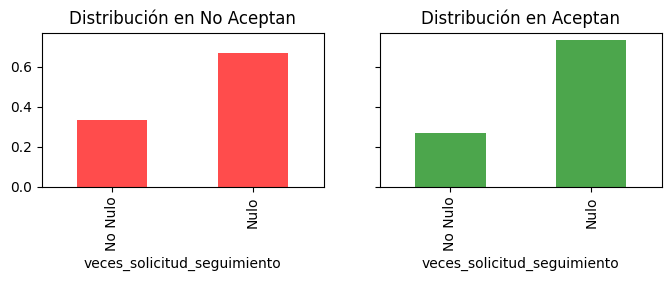

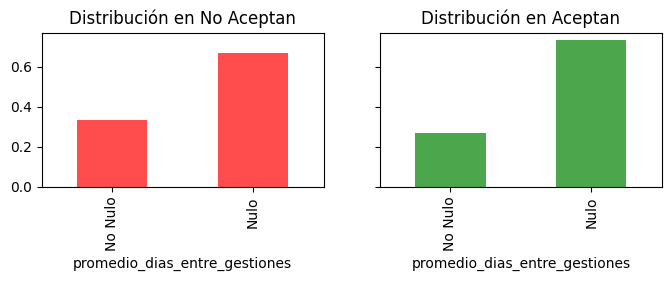

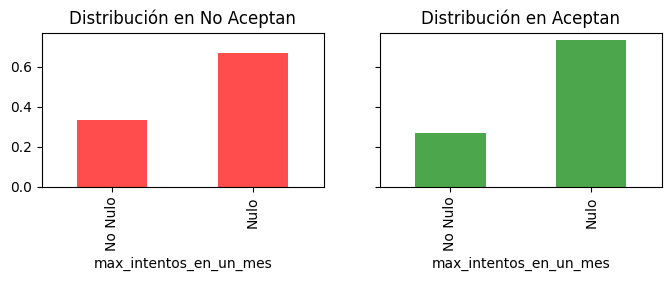

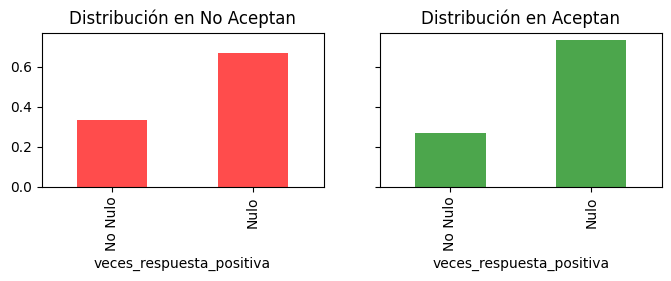

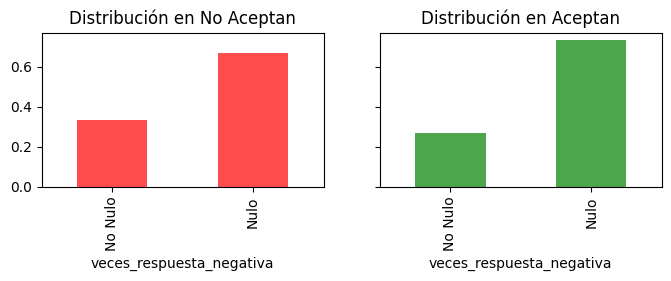

In [236]:
# ejecutemos la función en cada variable con datos faltantes
for var in vars_with_na:
    analyse_na_value(data, var)

# Numerical variables

Vamos a identificar qué variables numéricas tenemos en el conjunto de datos.

In [237]:
data.select_dtypes(["float","int"]).head(2)

,12M_MONTO,12M_TASA,18M_MONTO,18M_TASA,24M_MONTO,24M_TASA,36M_MONTO,36M_TASA,EDAD,veces_acepto_producto,tiempo_desde_ultima_conversion,tiempo_desde_ultima_negacion,intentos_totales,meses_gestionados,dias_ultima_gestion,veces_sin_respuesta,veces_solicitud_seguimiento,promedio_dias_entre_gestiones,max_intentos_en_un_mes,veces_respuesta_positiva,veces_respuesta_negativa,_merge_variables,target,Bancos_PLD_Total,Cajas_PLD_Total,Retail_PLD_Total,PLD_Total,Bancos_TC_Total,Retail_TC_Total,TC_Total,Bancos_PLD_Entidades,Cajas_PLD_Entidades,Retail_PLD_Entidades,PLD_Entidades,Bancos_TC_Entidades,Retail_TC_Entidades,TC_Entidades,CANTIDAD_CELULARES,TC_Entidades_Mas3,Tiene_Deuda_PLD
555108,8900.0,0.740,10100.0,0.740,10100.0,0.740,10100.0,0.740,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,314.0,0.0,314.0,0,0,0,0,1,0,1,1,0,0
555109,8800.0,0.799,11000.0,0.799,11000.0,0.799,11000.0,0.799,36.0,0.0,NaN,NaN,10.0,1.0,33.0,10.0,0.0,1.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,424.0,0.0,424.0,0,0,0,0,1,0,1,1,0,0


In [238]:
print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  40


,12M_MONTO,12M_TASA,18M_MONTO,18M_TASA,24M_MONTO,24M_TASA,36M_MONTO,36M_TASA,EDAD,veces_acepto_producto,tiempo_desde_ultima_conversion,tiempo_desde_ultima_negacion,intentos_totales,meses_gestionados,dias_ultima_gestion,veces_sin_respuesta,veces_solicitud_seguimiento,promedio_dias_entre_gestiones,max_intentos_en_un_mes,veces_respuesta_positiva,veces_respuesta_negativa,_merge_variables,target,Bancos_PLD_Total,Cajas_PLD_Total,Retail_PLD_Total,PLD_Total,Bancos_TC_Total,Retail_TC_Total,TC_Total,Bancos_PLD_Entidades,Cajas_PLD_Entidades,Retail_PLD_Entidades,PLD_Entidades,Bancos_TC_Entidades,Retail_TC_Entidades,TC_Entidades,CANTIDAD_CELULARES,TC_Entidades_Mas3,Tiene_Deuda_PLD
555108,8900.0,0.740,10100.0,0.740,10100.0,0.740,10100.0,0.740,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,314.0,0.0,314.0,0,0,0,0,1,0,1,1,0,0
555109,8800.0,0.799,11000.0,0.799,11000.0,0.799,11000.0,0.799,36.0,0.0,NaN,NaN,10.0,1.0,33.0,10.0,0.0,1.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,424.0,0.0,424.0,0,0,0,0,1,0,1,1,0,0
555110,9200.0,0.720,10400.0,0.720,10400.0,0.720,10400.0,0.720,36.0,0.0,NaN,NaN,8.0,1.0,34.0,8.0,0.0,3.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,133.0,0.0,133.0,0,0,0,0,1,0,1,2,0,0
555111,5000.0,0.799,6700.0,0.799,8000.0,0.799,9700.0,0.799,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2545.0,2545.0,4488.0,1279.0,5767.0,0,0,1,1,1,1,2,2,0,1
555112,7400.0,0.799,9900.0,0.799,11800.0,0.799,12400.0,0.799,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,14032.0,0.0,0.0,14032.0,200.0,68.0,268.0,1,0,0,1,1,1,2,1,0,1


Vemos que hay una tendencia a una disminución en el precio con las casas más antiguas. En otras palabras, cuanto más tiempo haya entre la construcción o remodelación de la casa y la fecha de venta, menor será el precio de venta.

Lo cual tiene sentido, ya que esto significa que la casa tendrá una apariencia más antigua y potencialmente necesitará reparaciones.

## Discrete variables

Vamos a identificar cuáles variables son discretas, es decir, muestran un número finito de valores.

In [239]:
# hagamos una lista de variables discretas
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20]


print('Numero de Variables Discretas: ', len(discrete_vars))

Numero de Variables Discretas:  17


In [240]:
# Visualizamos las Variables Discretas

data[discrete_vars].head()

,veces_acepto_producto,tiempo_desde_ultima_conversion,meses_gestionados,veces_solicitud_seguimiento,veces_respuesta_positiva,_merge_variables,target,Bancos_PLD_Entidades,Cajas_PLD_Entidades,Retail_PLD_Entidades,PLD_Entidades,Bancos_TC_Entidades,Retail_TC_Entidades,TC_Entidades,CANTIDAD_CELULARES,TC_Entidades_Mas3,Tiene_Deuda_PLD
555108,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,1,0,1,1,0,0
555109,0.0,NaN,1.0,0.0,0.0,1.0,0.0,0,0,0,0,1,0,1,1,0,0
555110,0.0,NaN,1.0,0.0,0.0,1.0,0.0,0,0,0,0,1,0,1,2,0,0
555111,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,1,1,1,1,2,2,0,1
555112,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1,0,0,1,1,1,2,1,0,1


Obtenemos variables que corresponden al conteo de Deudas que tiene el Cliente, ya sea en productos de PLD o TC en otras entidades Financieras.

Así como su comportamiento historico de call center en llamadas realizadas en tiempos pasados.

In [242]:
from collections import Counter
import pandas as pd

def balanced_resampling(data,fact =  0.5 , replace=True):
    # Contar la cantidad de muestras por clase
    n_class_0 = data.target.value_counts().max()
    
    if replace:
        target_0 = data.query("target == 0 ").sample(n = round(n_class_0 *fact ) , replace=False)
        target_1 = data.query("target == 1 ").sample(n = target_0.shape[0] , replace=replace)
    else:
        target_1 = data.query("target == 1 ")
        target_0 = data.query("target == 0 ").sample(n = target_1.shape[0] , replace=False)
    df_balanced = pd.concat([target_0 , target_1])
    

    print("Distribución después del balanceo:", Counter(df_balanced["target"]))
    return df_balanced

# Aplicar la función


In [243]:
import matplotlib.pyplot as plt

def barras_apiladas_target(df1, df2, var, nombres):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)  # Crear figura con 2 gráficos en una fila

    # Definir colores personalizados para cada categoría del target
    colores = ["orange", "green"]  # 0 = No aceptó producto, 1 = Aceptó producto

    # Iterar sobre los DataFrames
    for i, (df, nombre, ax) in enumerate(zip([df1, df2], nombres, axes)):
        # Calcular la tabla de porcentajes
        freq_table = df.groupby([var, "target"]).size().unstack().fillna(0)  # Evitar NaN
        freq_table_perc = freq_table.div(freq_table.sum(axis=1), axis=0) * 100  # Convertir a porcentaje
        # Graficar con las categorías en el eje Y y la target como leyenda
        freq_table_perc.plot(kind="barh", stacked=True, color=colores, edgecolor="black", ax=ax, width=0.7)

        # Añadir etiquetas con los porcentajes en las barras
        for p in ax.patches:
            width = p.get_width()  # Valor del porcentaje
            if width > 0:  # Evitar etiquetas en valores 0
                ax.annotate(f'{width:.2f}%', 
                            (p.get_x() + width / 2, p.get_y() + p.get_height() / 2), 
                            ha='center', fontsize=10, color='black')

        ax.set_title(f"{nombre}: Distribución del Target por {var} (%)")
        ax.set_xlabel("Porcentaje")
        ax.set_ylabel(var)  # Ahora el eje Y es la variable independiente
        ax.legend(["No aceptó producto", "Aceptó producto"], title="Target")

    plt.tight_layout()
    plt.show()

# Uso de la función con dos dataframes


In [244]:
df_balanced = balanced_resampling(data, fact =  1, replace=True)


Distribución después del balanceo: Counter({0.0: 210940, 1.0: 210940})


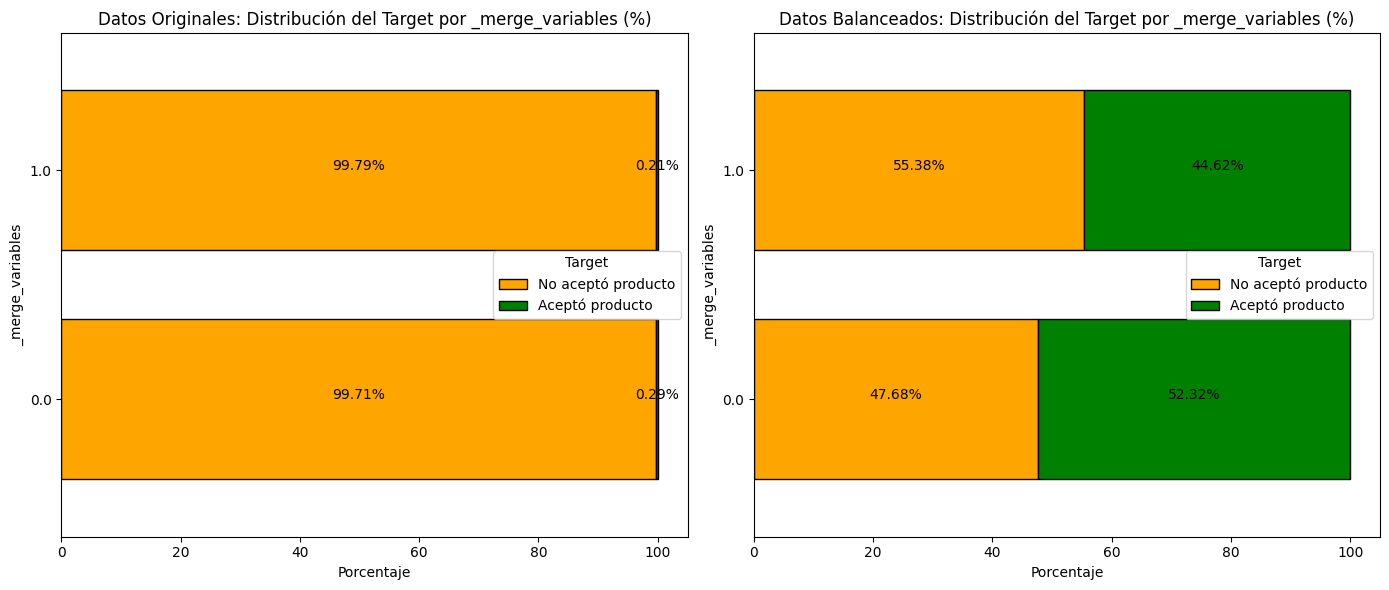

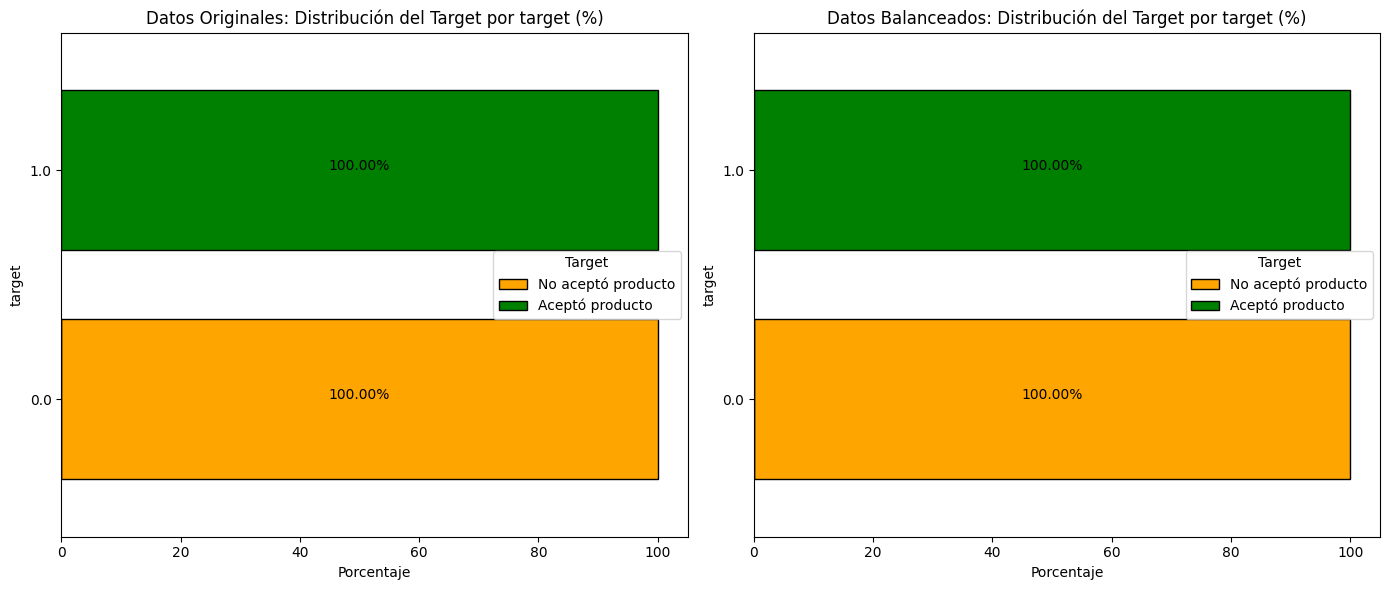

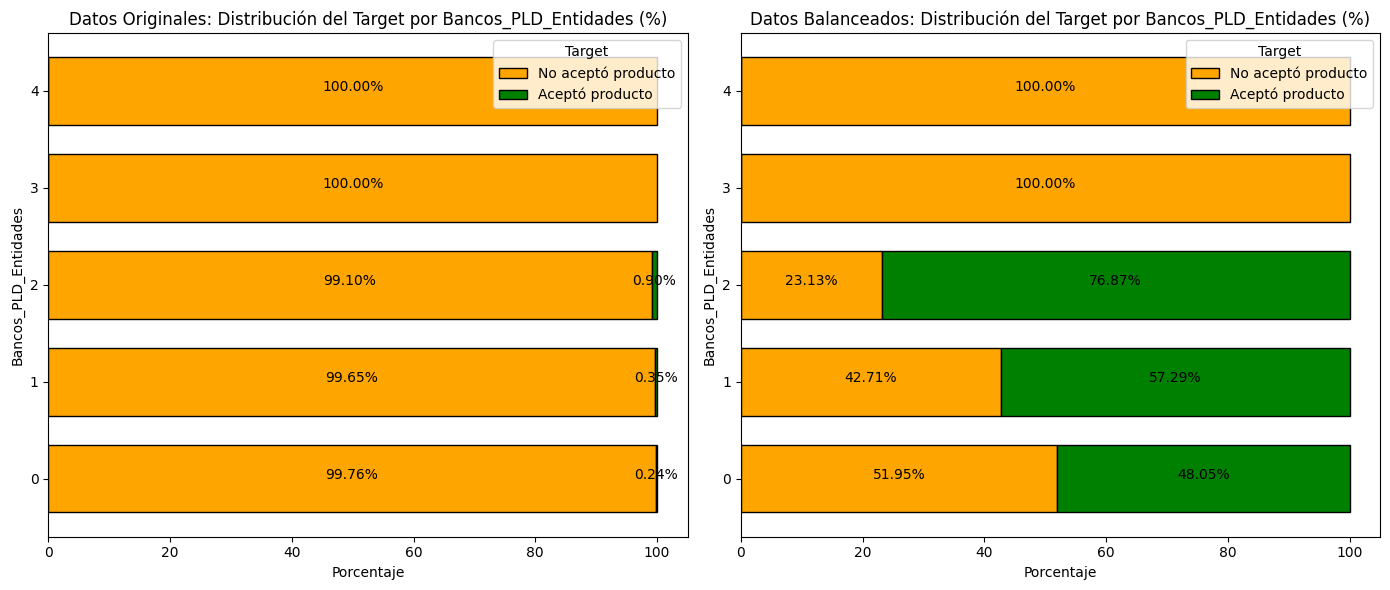

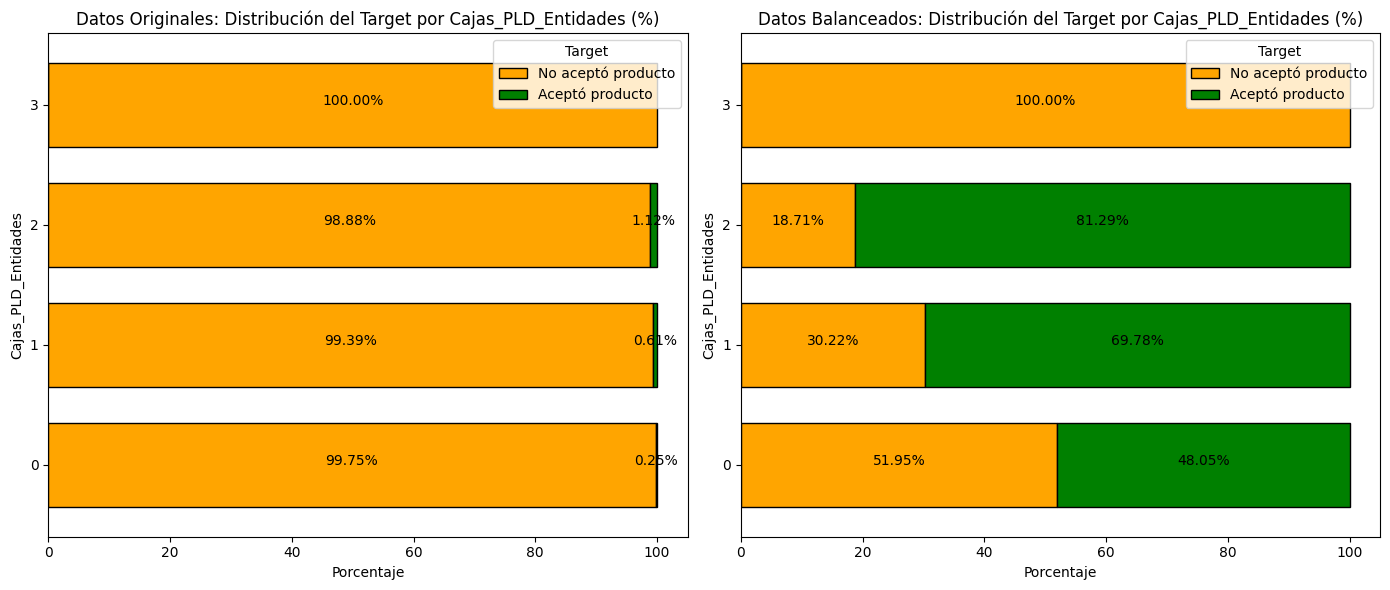

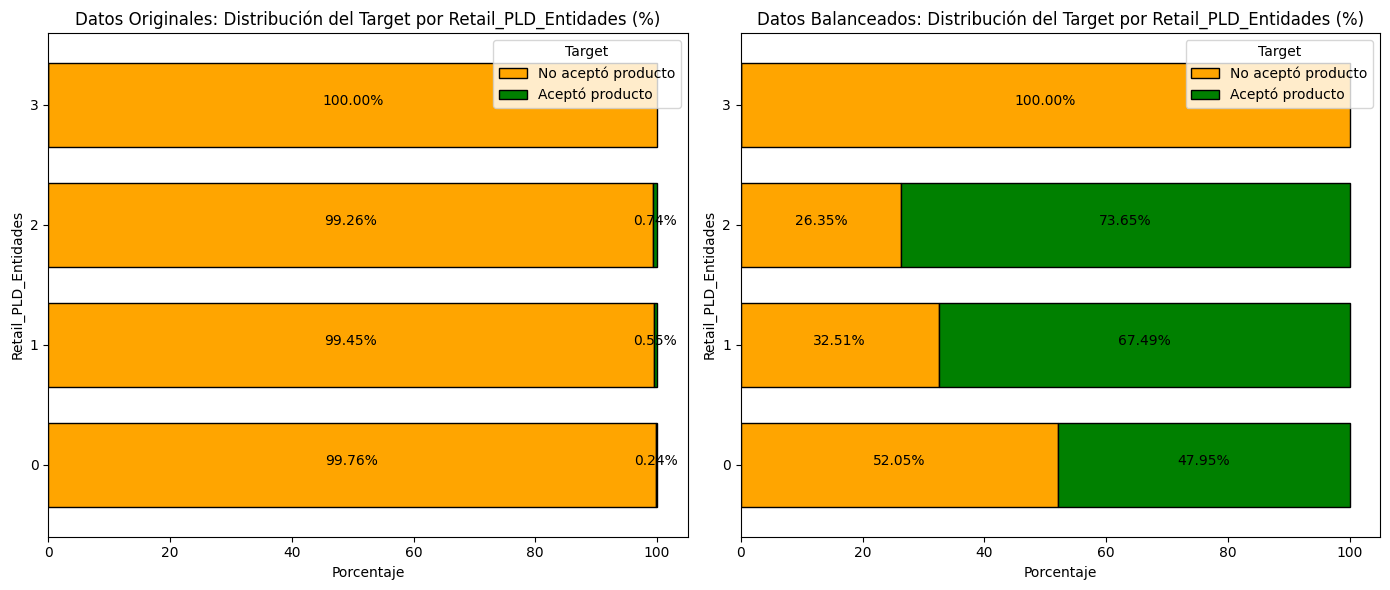

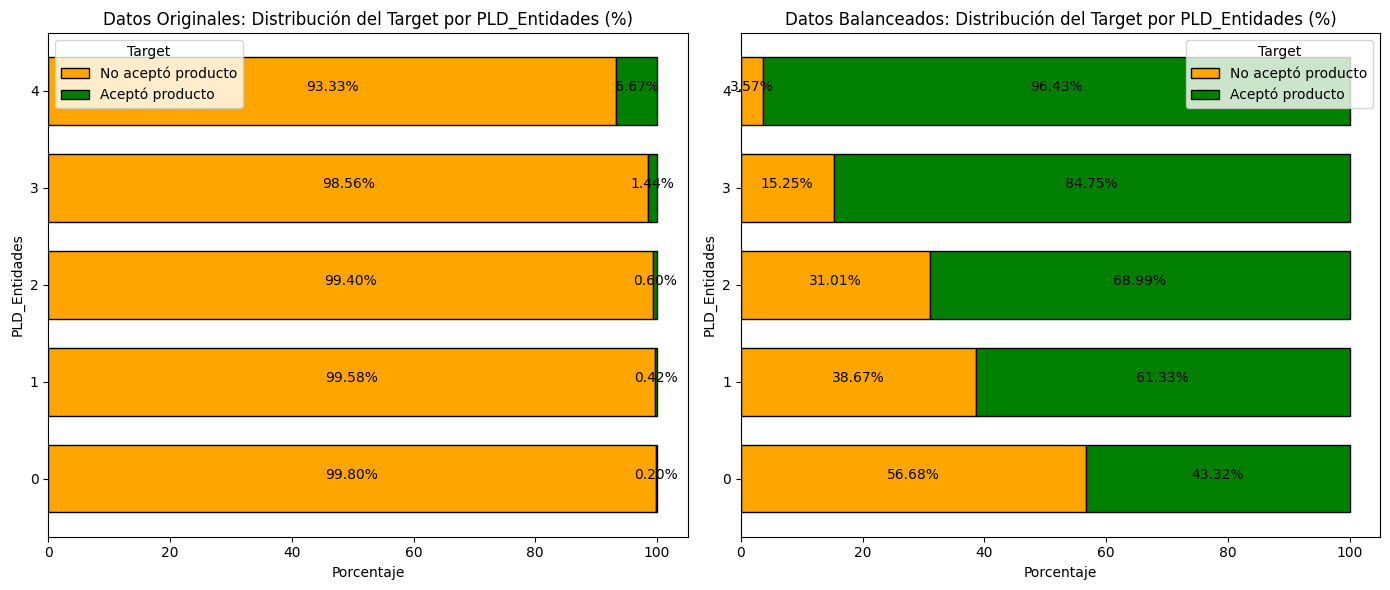

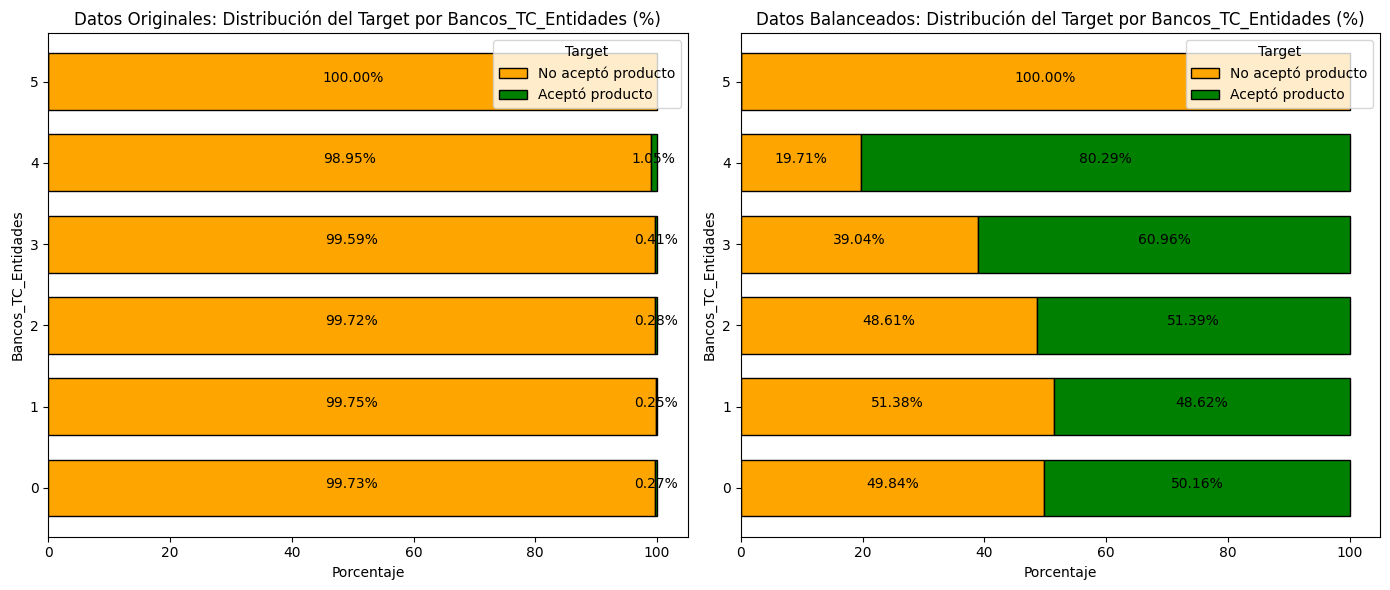

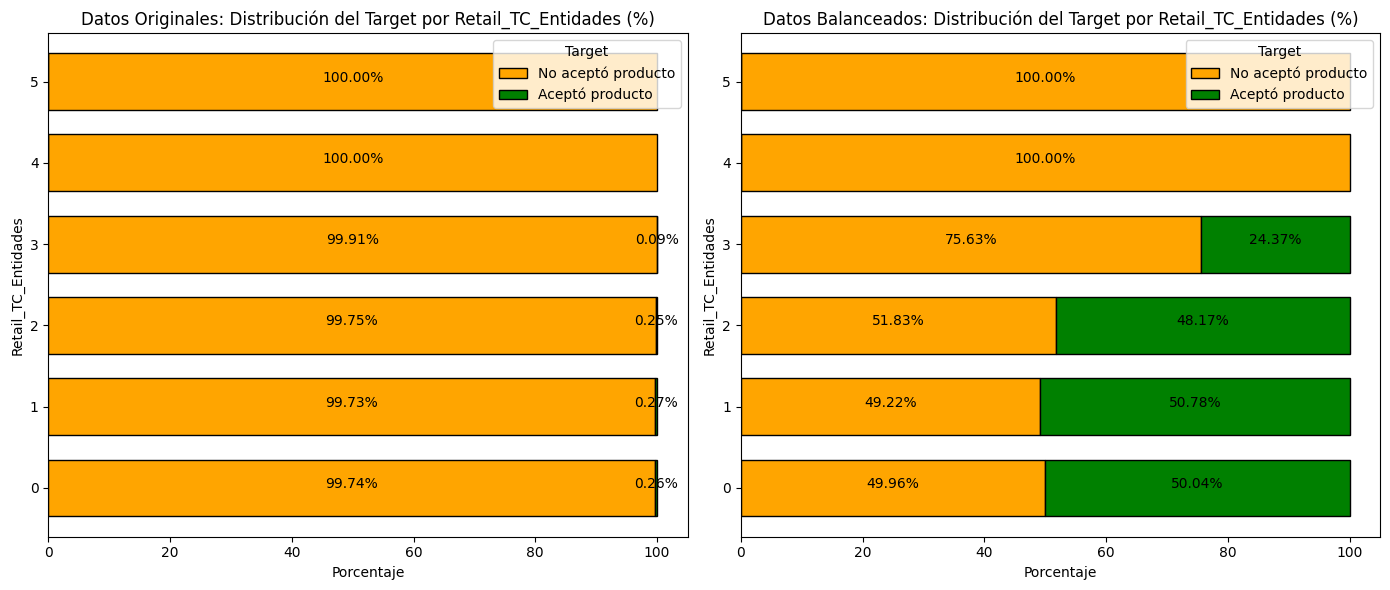

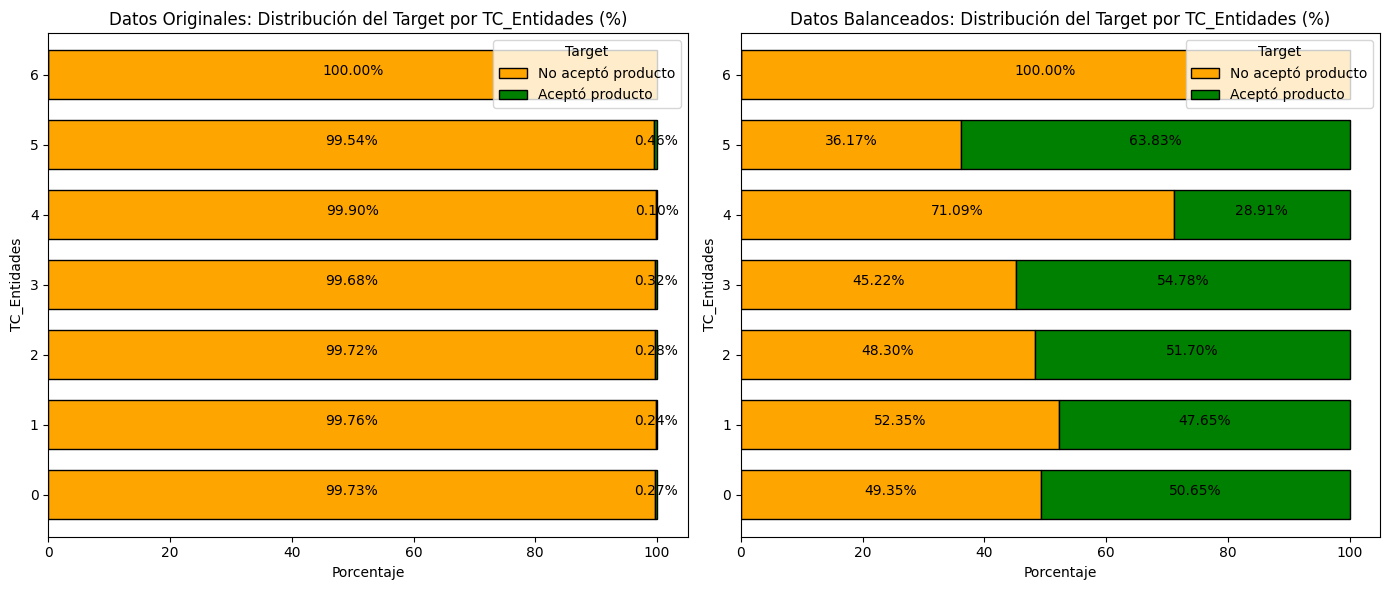

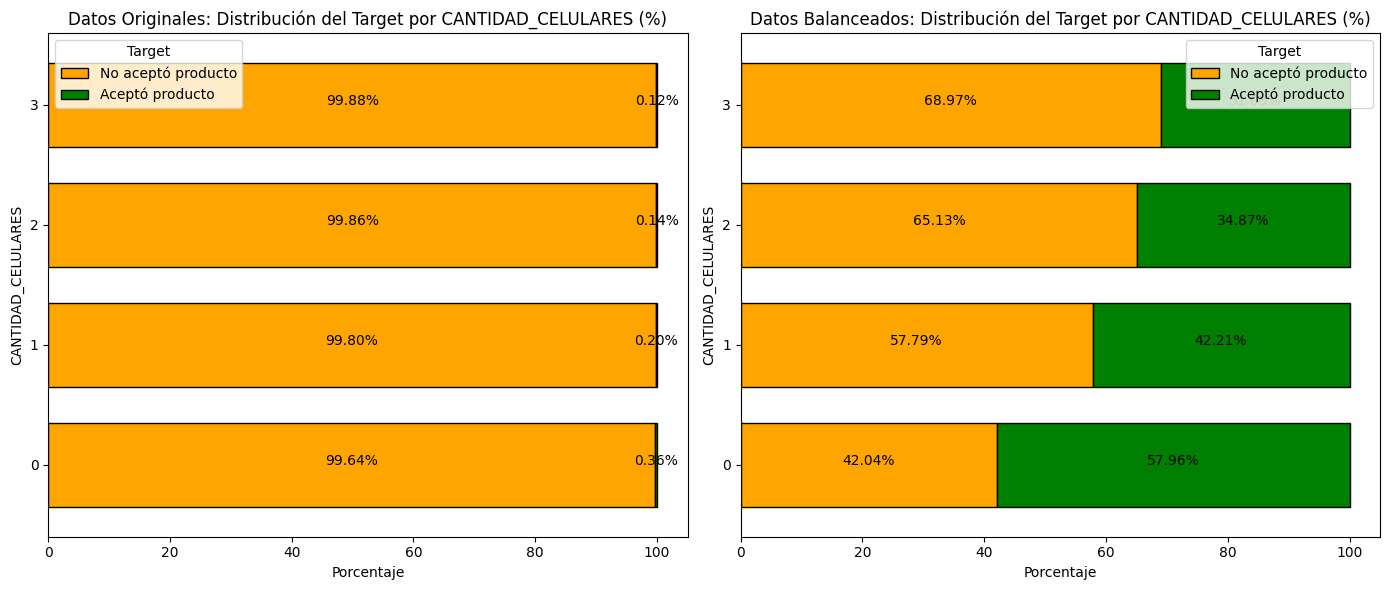

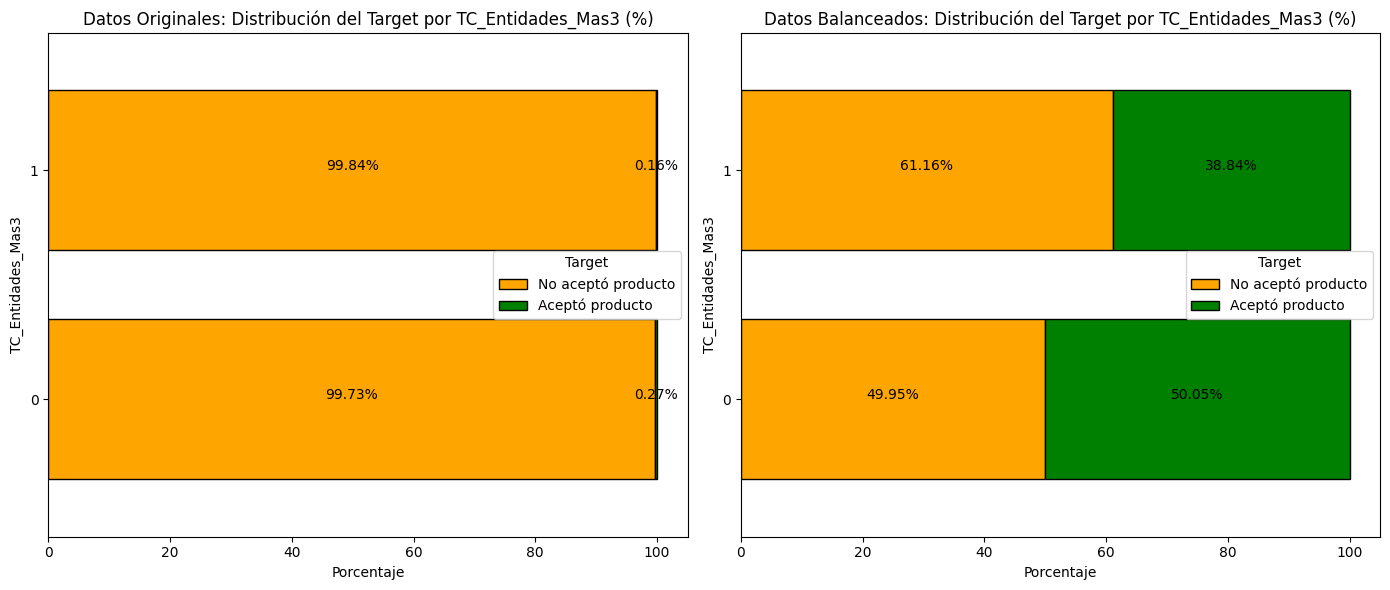

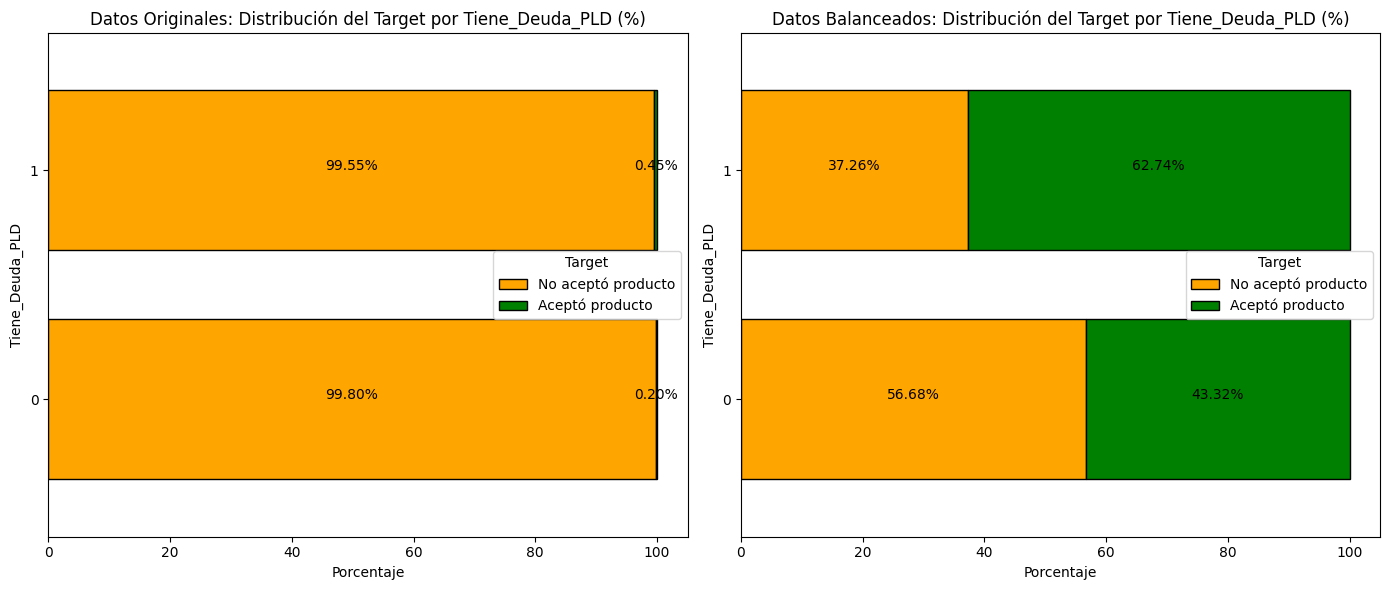

In [245]:
for var in discrete_vars:
    if var not in num_na:
        barras_apiladas_target(data, df_balanced, var=var, nombres=["Datos Originales", "Datos Balanceados"])


Para una mejor apreciación de los datos, se realizó un balanceo por oversampling para identificar mejor que caracteristicas resaltan frente al resto en cada variable.

## Continuous variables

Vamos a encontrar la distribución de las variables continuas. Consideraremos como variables continuas todas aquellas que no son temporales o discretas.

In [246]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  23


In [247]:
# Visualizamos las Variables Continuas

data[cont_vars].head()

,12M_MONTO,12M_TASA,18M_MONTO,18M_TASA,24M_MONTO,24M_TASA,36M_MONTO,36M_TASA,EDAD,tiempo_desde_ultima_negacion,intentos_totales,dias_ultima_gestion,veces_sin_respuesta,promedio_dias_entre_gestiones,max_intentos_en_un_mes,veces_respuesta_negativa,Bancos_PLD_Total,Cajas_PLD_Total,Retail_PLD_Total,PLD_Total,Bancos_TC_Total,Retail_TC_Total,TC_Total
555108,8900.0,0.740,10100.0,0.740,10100.0,0.740,10100.0,0.740,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,314.0,0.0,314.0
555109,8800.0,0.799,11000.0,0.799,11000.0,0.799,11000.0,0.799,36.0,NaN,10.0,33.0,10.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,424.0,0.0,424.0
555110,9200.0,0.720,10400.0,0.720,10400.0,0.720,10400.0,0.720,36.0,NaN,8.0,34.0,8.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,133.0,0.0,133.0
555111,5000.0,0.799,6700.0,0.799,8000.0,0.799,9700.0,0.799,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2545.0,2545.0,4488.0,1279.0,5767.0
555112,7400.0,0.799,9900.0,0.799,11800.0,0.799,12400.0,0.799,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14032.0,0.0,0.0,14032.0,200.0,68.0,268.0


In [248]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

def generar_transformaciones(df, columna):
    if columna not in df.columns:
        raise ValueError("La columna especificada no existe en el dataframe.")

    variable = df[columna]  # Extraer la columna

    # Crear un nuevo DataFrame con la variable original
    df_trans = pd.DataFrame({columna: variable})

    # Aplicar transformaciones
    df_trans[f"{columna}_log1p"] = np.log1p(variable)  # log(x + 1)
    df_trans[f"{columna}_log"] = np.log(variable + 1)  # log(x + 1) alternativa
    df_trans[f"{columna}_sqrt"] = np.sqrt(variable)  # Raíz cuadrada
    df_trans[f"{columna}_reciproco"] = 1 / (variable + 1)  # Recíproco
    df_trans[f"{columna}_exponencial"] = variable**2  # Cuadrática

    # Transformación log_reflejo (para sesgo negativo)
    df_trans[f"{columna}_log_reflejo"] = np.log(variable.max() + 1 - variable)

    return df_trans


## Correlaciones
Procedemos a realizar el retiro de ciertas variables las cuales ya contaban con una correlación demasiado alta entre ellas.

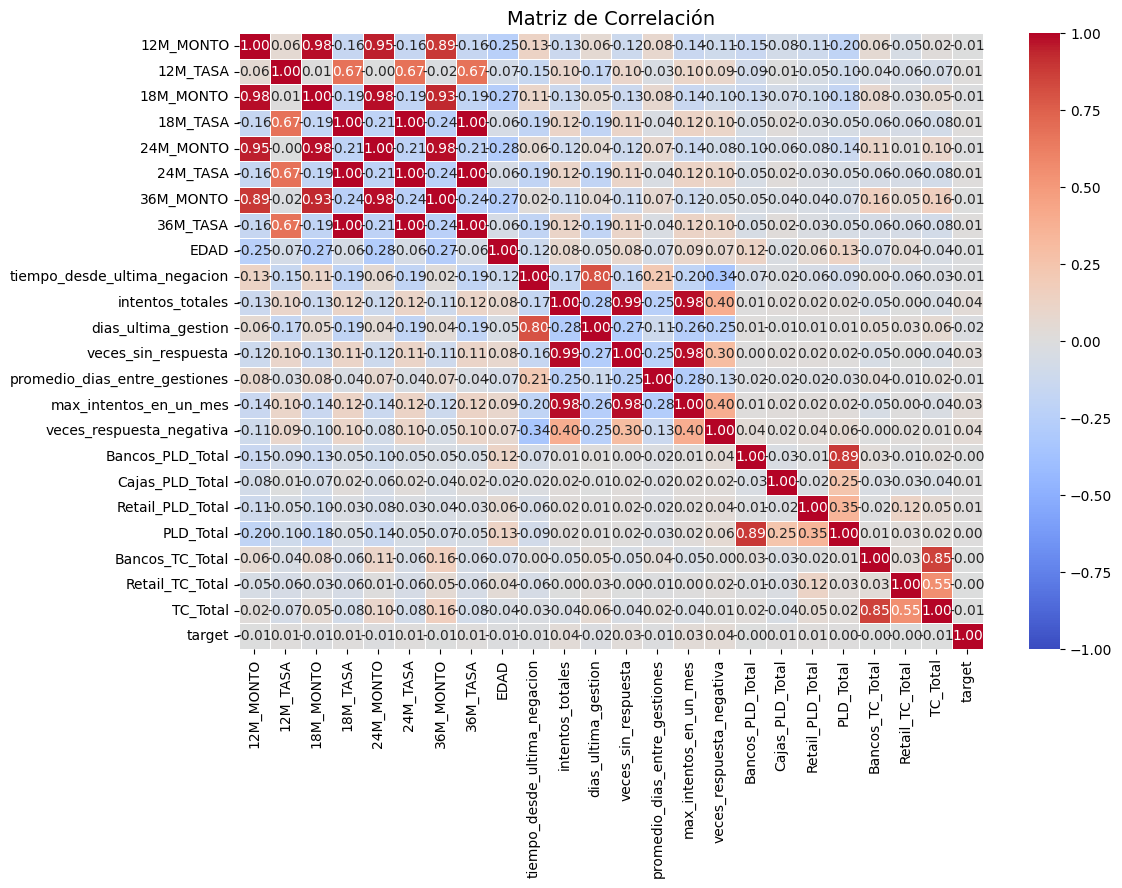

In [251]:
corr_matrix = data[cont_vars+["target"]].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)

# Título
plt.title("Matriz de Correlación", fontsize=14)

# Mostrar gráfico
plt.show()

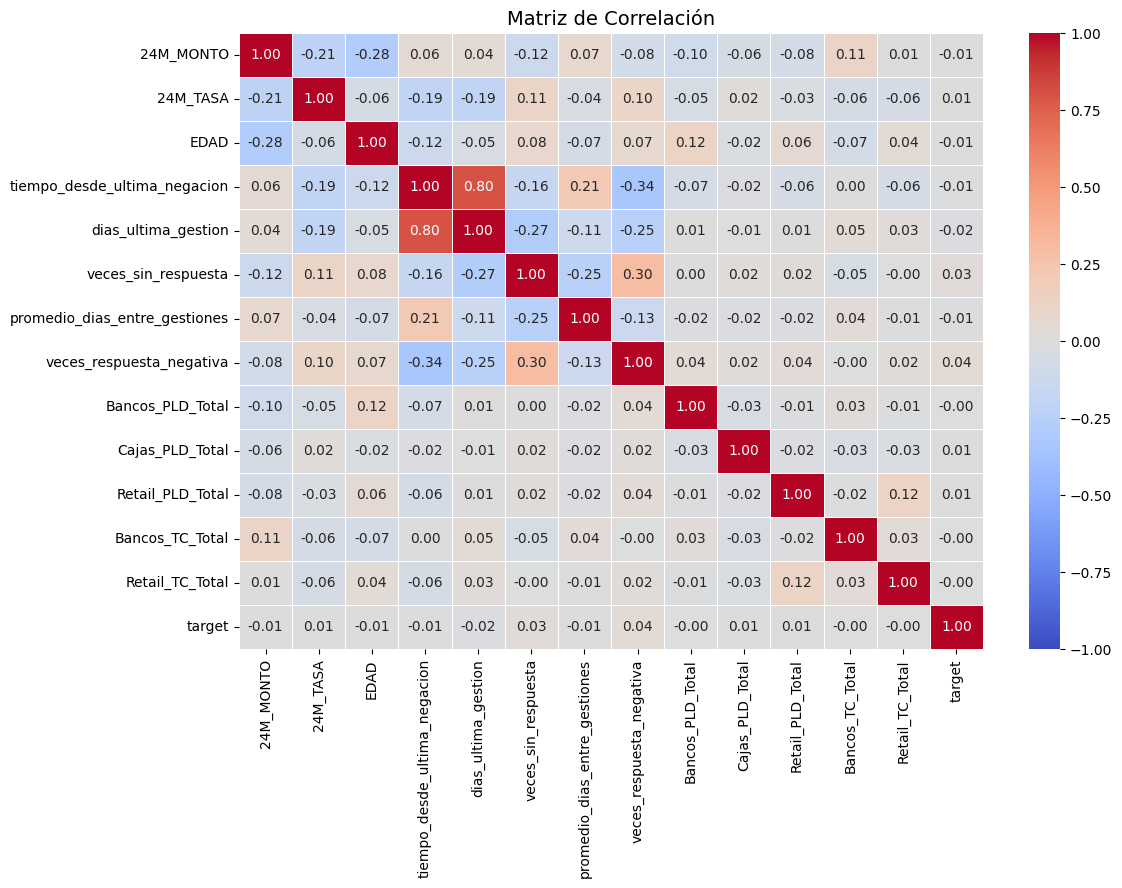

In [252]:
corr_matrix = data[[
    '24M_MONTO',
    '24M_TASA',
 'EDAD',
 'tiempo_desde_ultima_negacion',
 #'intentos_totales',
 'dias_ultima_gestion',
 'veces_sin_respuesta',
 'promedio_dias_entre_gestiones',
# 'max_intentos_en_un_mes',
 'veces_respuesta_negativa',
 'Bancos_PLD_Total',
 'Cajas_PLD_Total',
 'Retail_PLD_Total',
# 'PLD_Total',
 'Bancos_TC_Total',
 'Retail_TC_Total',
# 'TC_Total'
]+["target"]].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)

# Título
plt.title("Matriz de Correlación", fontsize=14)

# Mostrar gráfico
plt.show()

In [253]:
col_independientes = list(corr_matrix.columns)[:-1]

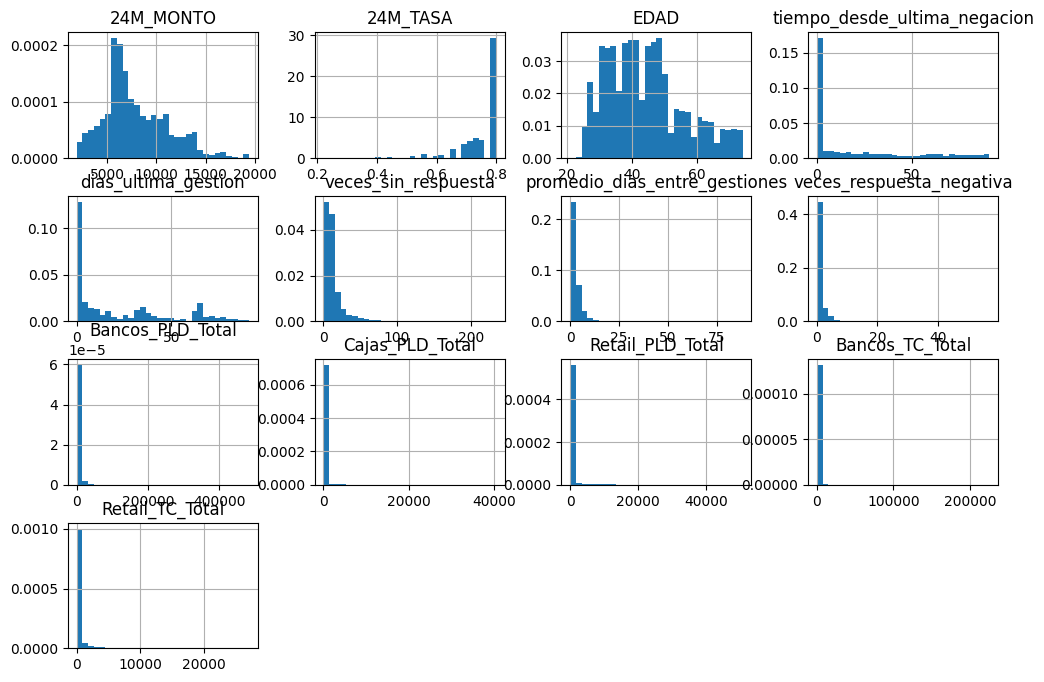

In [254]:
data[col_independientes].hist(bins=30, figsize=(12,8), density=True)
plt.show()

Las variables no están distribuidas normalmente. Y hay algunas en particular que están extremadamente sesgadas como Retail_TC_Total, Bancos_TC_Total, Retail_PLD_Total, Cajas_PLD_Total, Bancos_PLD_Total, veces_respuesta_negativa, promedio_dias_entre_gestiones, veces_sin_respuesta

A veces, transformar las variables para mejorar la dispersión de los valores, mejora el rendimiento del modelo. Pero es poco probable que una transformación ayude a cambiar la distribución de las variables extremadamente sesgadas de manera drástica.

Podemos aplicar una transformación Yeo-Johnson a variables como 24M_MONTO, 24M_TASA, EDAD , y una transformación binaria a variables como Retail_TC_Total, Bancos_TC_Total, Retail_PLD_Total, Cajas_PLD_Total, Bancos_PLD_Total, veces_respuesta_negativa, promedio_dias_entre_gestiones, veces_sin_respuesta

Vamos a hacerlo.

In [255]:
# primero hagamos una lista con las variables extremadamente sesgadas
# para más adelante

skewed = [
  'tiempo_desde_ultima_negacion',
 'dias_ultima_gestion',
 'veces_sin_respuesta',
 'promedio_dias_entre_gestiones',
 'veces_respuesta_negativa',
 'Bancos_PLD_Total',
 'Cajas_PLD_Total',
 'Retail_PLD_Total',
 'Bancos_TC_Total',
 'Retail_TC_Total']

In [256]:
# capturar las variables continuas restantes

cont_vars = [
'24M_MONTO',
 '24M_TASA',
 'EDAD',
]

### Yeo-Johnson transformation

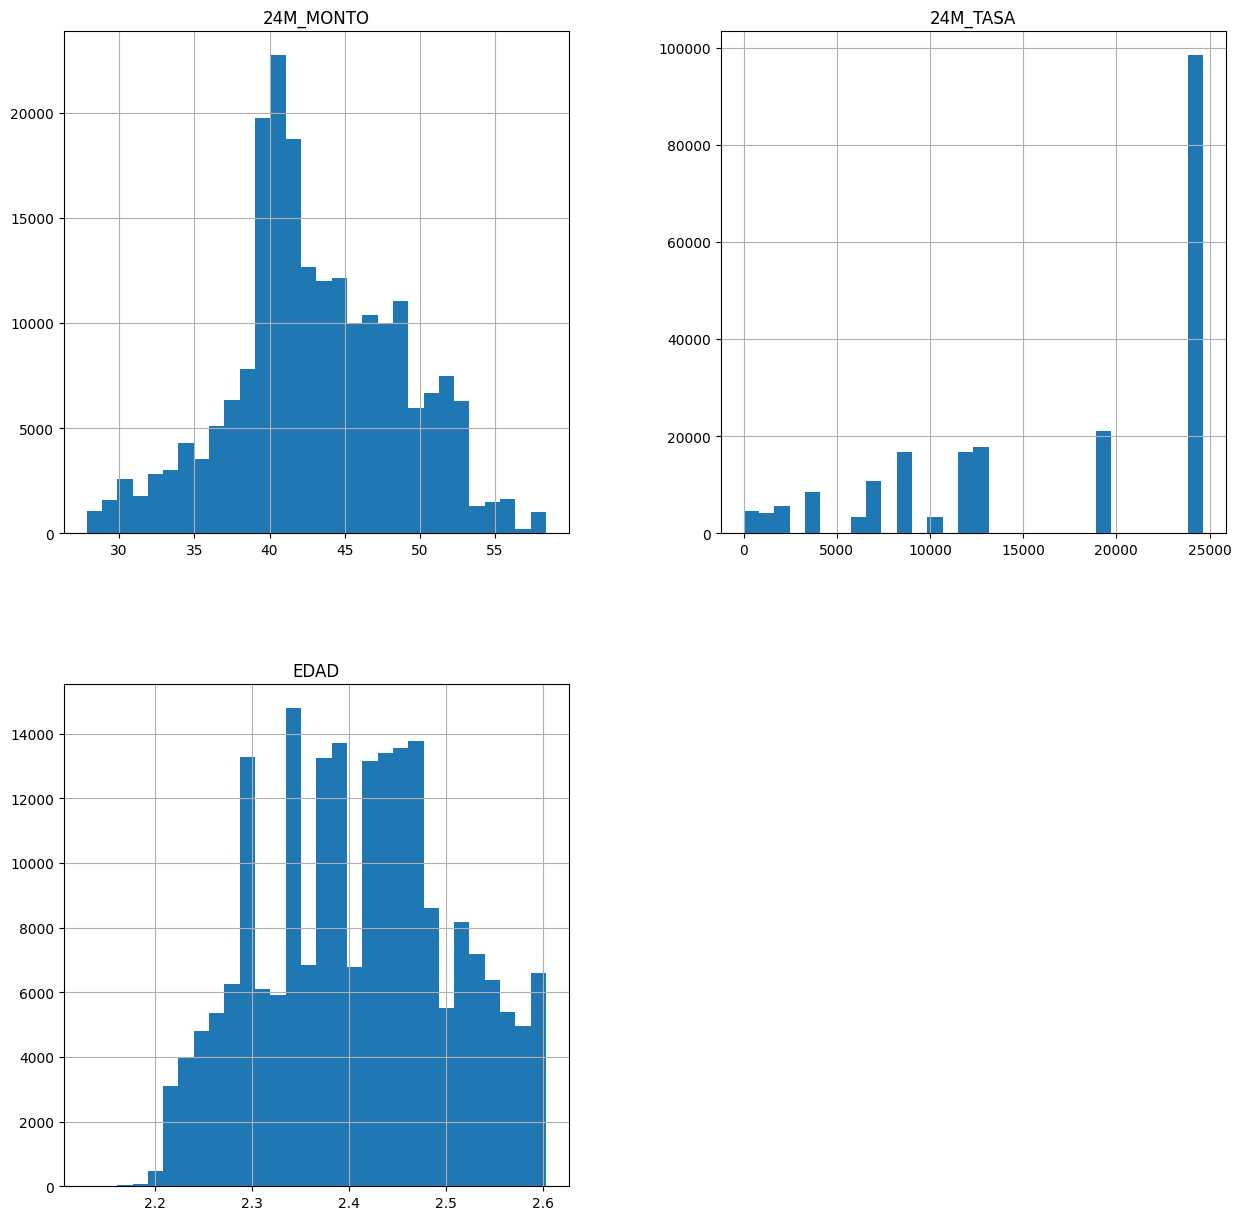

In [257]:
# Let's go ahead and analyse the distributions of the variables
# after applying a yeo-johnson transformation

# temporary copy of the data
tmp = data.copy()

# Lista para almacenar variables problemáticas
problematic_vars = []

# Aplicar la transformación Yeo-Johnson a cada variable continua
for var in cont_vars:
    try:
        tmp[var], param = stats.yeojohnson(data[var])
    except Exception as e:
        print(f'Error al transformar la variable {var}: {e}')
        problematic_vars.append(var)

# Eliminar variables problemáticas de cont_vars
#cont_vars = [var for var in cont_vars if var not in problematic_vars]

# Graficar los histogramas de las variables transformadas
tmp[cont_vars].hist(bins=30, figsize=(15, 15))
plt.show()


 ### Logarithmic transformation

In [258]:
cont_vars

['24M_MONTO', '24M_TASA', 'EDAD']

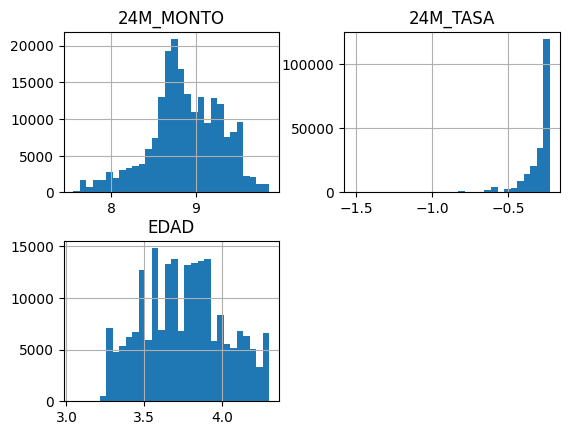

In [259]:
# Let's go ahead and analyse the distributions of these variables
# after applying a logarithmic transformation

tmp = data.copy()

for var in cont_vars:

    # transform the variable with logarithm
    tmp[var] = np.log(data[var])

tmp[cont_vars].hist(bins=30)
plt.show()

La distribución de las variables ahora parece más "gaussiana".

Vamos a evaluar su relación con el objetivo.

C:\Users\Luis Villacorta\AppData\Local\Temp\ipykernel_33584\1875916065.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="target", y=var, ax=axes[i, 0], palette="coolwarm")
C:\Users\Luis Villacorta\AppData\Local\Temp\ipykernel_33584\1875916065.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tmp, x="target", y=var, ax=axes[i, 1], palette="coolwarm")
C:\Users\Luis Villacorta\AppData\Local\Temp\ipykernel_33584\1875916065.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="target", y=var, ax=axes[i, 0], p

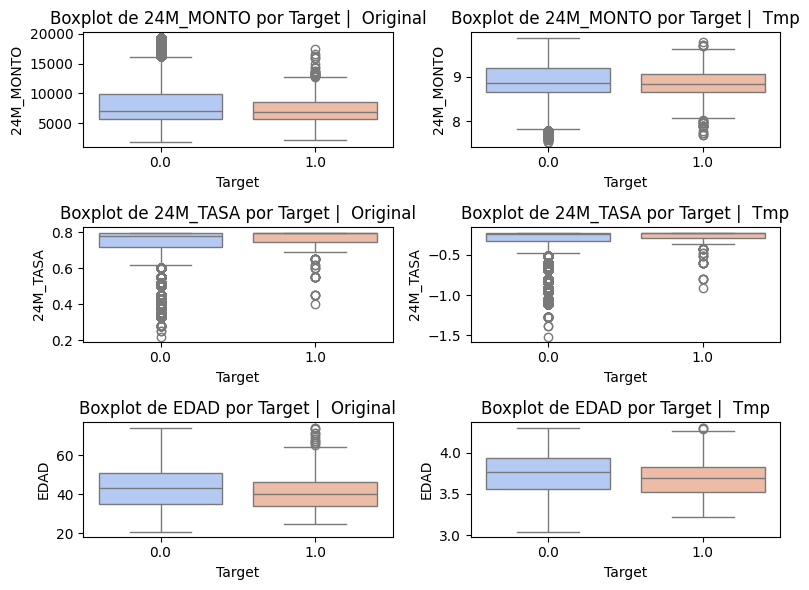

In [260]:
# let's plot the original or transformed variables
# vs sale price, and see if there is a relationship
import math
# Número de variables
num_vars = len(cont_vars)
num_cols = 2  # KDE a la izquierda, Boxplot a la derecha
num_rows = math.ceil(num_vars)  # Una fila por variable

# Crear subgráficos (KDE en la primera columna, Boxplot en la segunda)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8, 2 * num_rows))

for i, var in enumerate(cont_vars):
    # KDE a la izquierda
    sns.boxplot(data=data, x="target", y=var, ax=axes[i, 0], palette="coolwarm")
    axes[i, 0].set_title(f"Boxplot de {var} por Target |  Original")
    axes[i, 0].set_xlabel("Target")
    axes[i, 0].set_ylabel(var)

    # Boxplot a la derecha
    sns.boxplot(data=tmp, x="target", y=var, ax=axes[i, 1], palette="coolwarm")
    axes[i, 1].set_title(f"Boxplot de {var} por Target |  Tmp")
    axes[i, 1].set_xlabel("Target")
    axes[i, 1].set_ylabel(var)

plt.tight_layout()
plt.show()

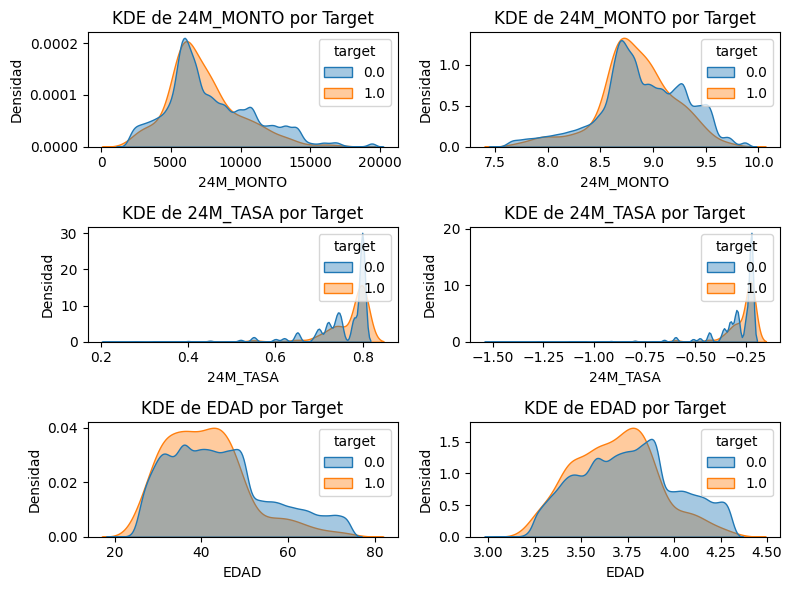

In [261]:
# let's plot the original or transformed variables
# vs sale price, and see if there is a relationship

# Número de variables
num_vars = len(cont_vars)
num_cols = 2  # KDE a la izquierda, Boxplot a la derecha
num_rows = math.ceil(num_vars)  # Una fila por variable

# Crear subgráficos (KDE en la primera columna, Boxplot en la segunda)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8, 2 * num_rows))

for i, var in enumerate(cont_vars):
    # KDE a la izquierda
    sns.kdeplot(data=data, x=var, hue="target", common_norm=False, fill=True, alpha=0.4, ax=axes[i, 0])
    axes[i, 0].set_title(f"KDE de {var} por Target")
    axes[i, 0].set_xlabel(var)
    axes[i, 0].set_ylabel("Densidad")
    
    sns.kdeplot(data=tmp, x=var, hue="target", common_norm=False, fill=True, alpha=0.4, ax=axes[i, 1])
    axes[i, 1].set_title(f"KDE de {var} por Target")
    axes[i, 1].set_xlabel(var)
    axes[i, 1].set_ylabel("Densidad")


plt.tight_layout()
plt.show()

Las variables transformadas tienen una mejor dispersión de los valores, lo que a su vez puede ayudar a hacer mejores predicciones.

## Skewed variables (Variables Sesgadas)

Vamos a transformarlas en variables binarias y ver cuán predictivas son:

In [262]:
skewed

['tiempo_desde_ultima_negacion',
 'dias_ultima_gestion',
 'veces_sin_respuesta',
 'promedio_dias_entre_gestiones',
 'veces_respuesta_negativa',
 'Bancos_PLD_Total',
 'Cajas_PLD_Total',
 'Retail_PLD_Total',
 'Bancos_TC_Total',
 'Retail_TC_Total']

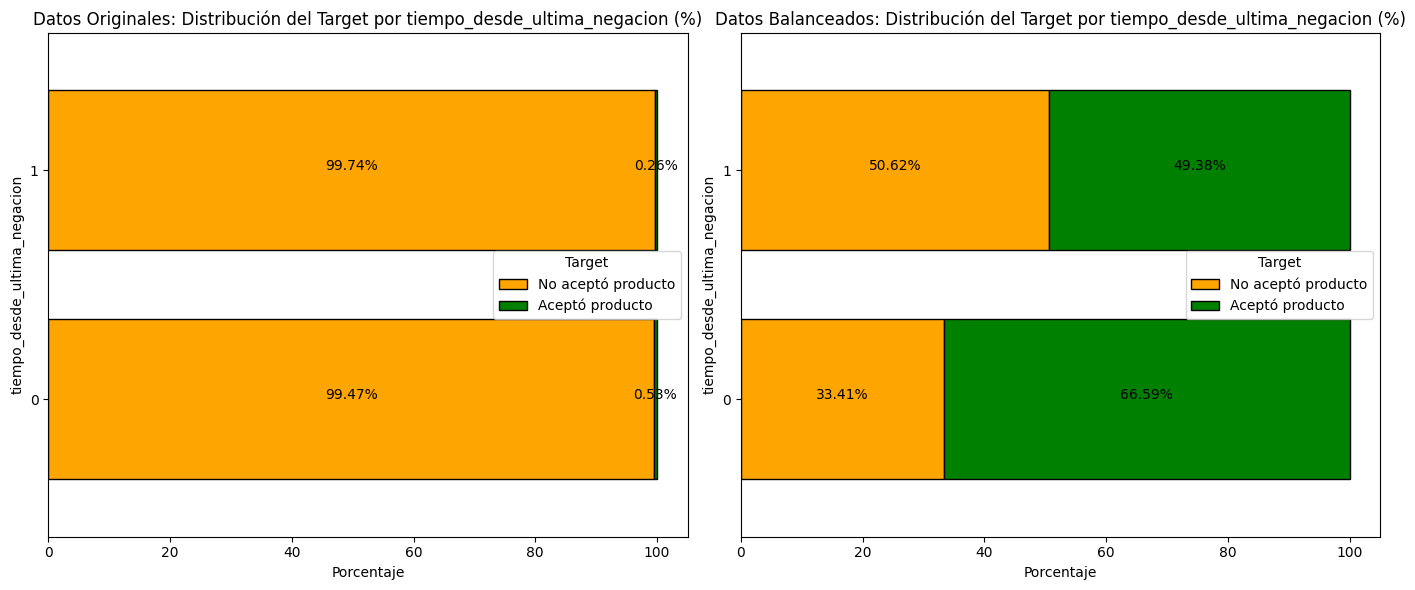

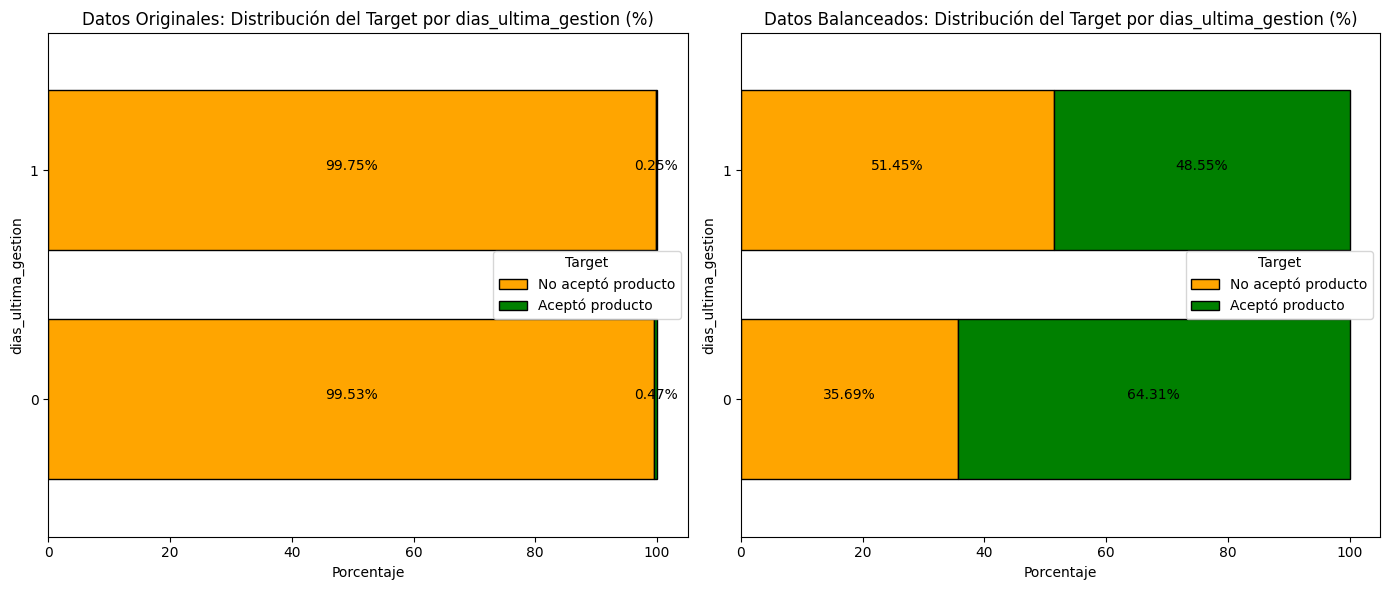

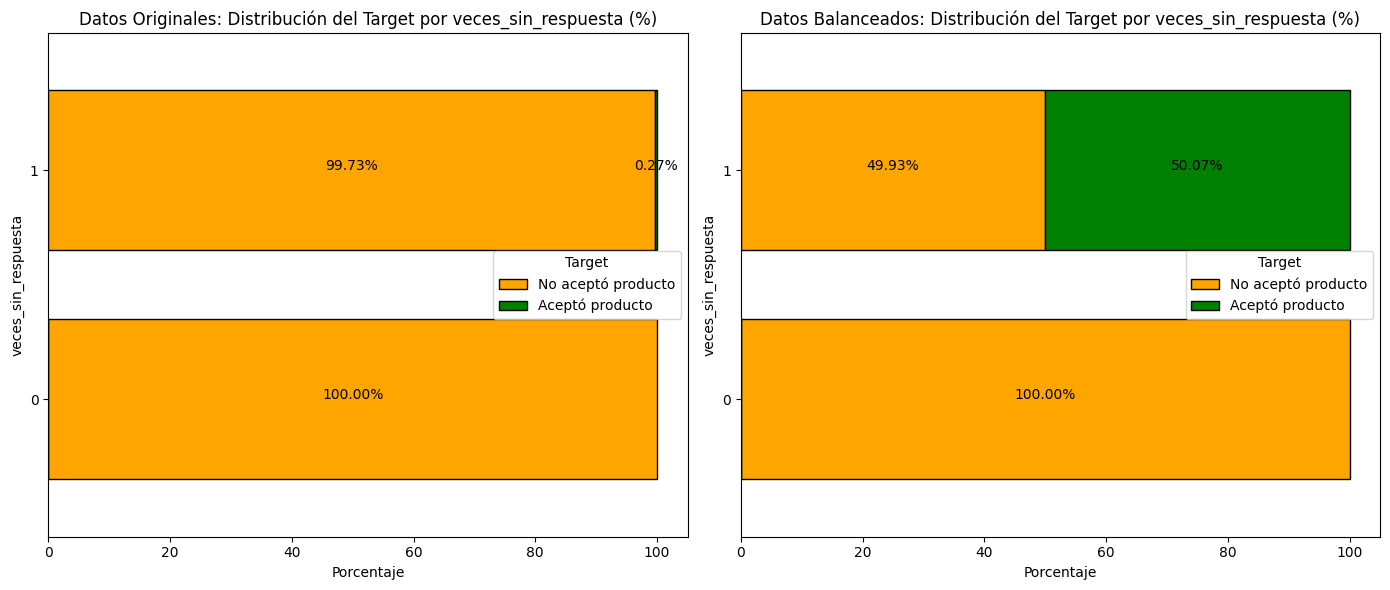

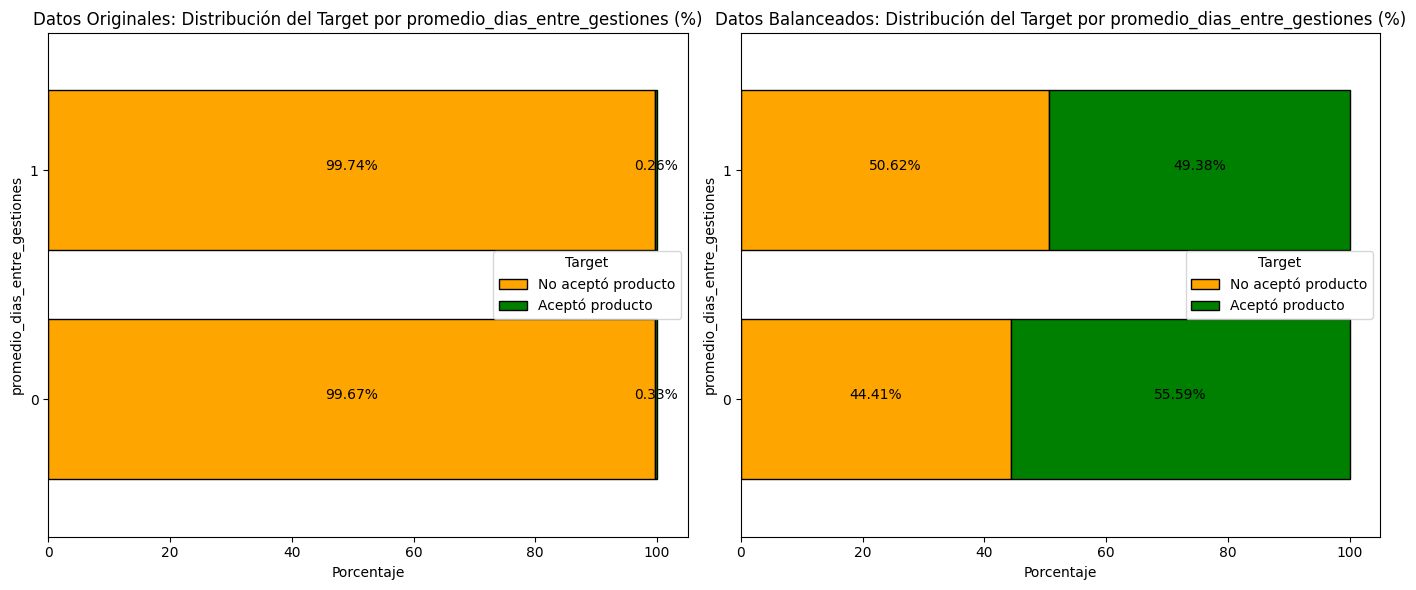

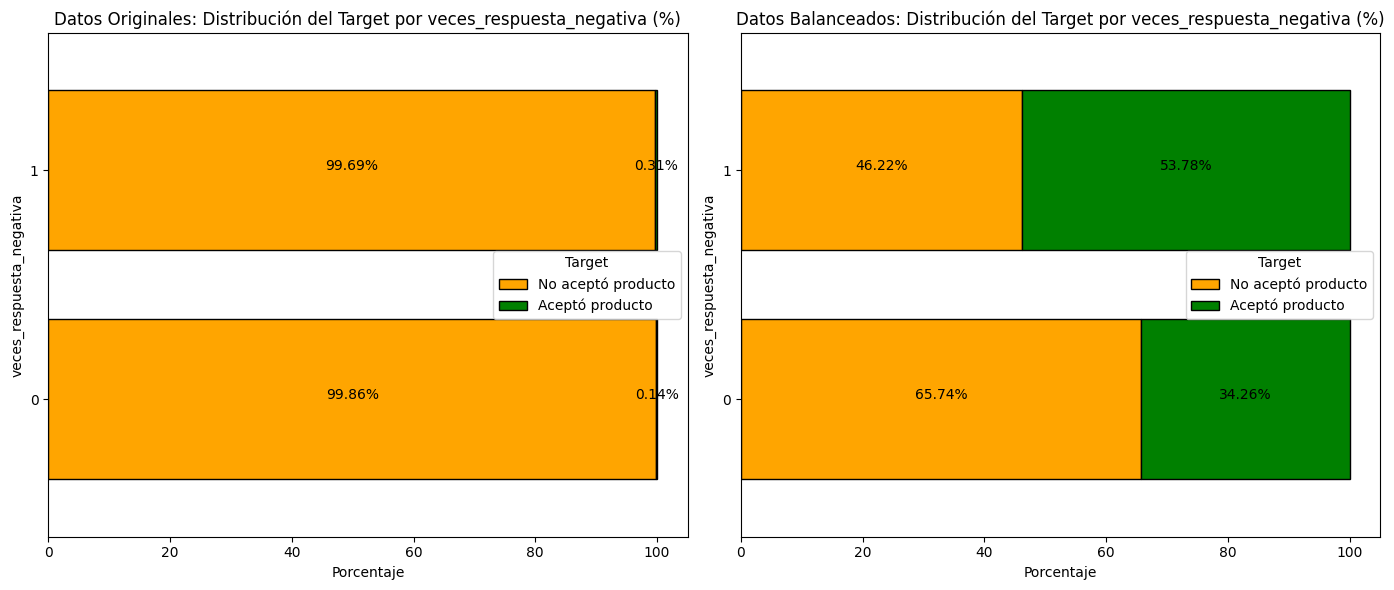

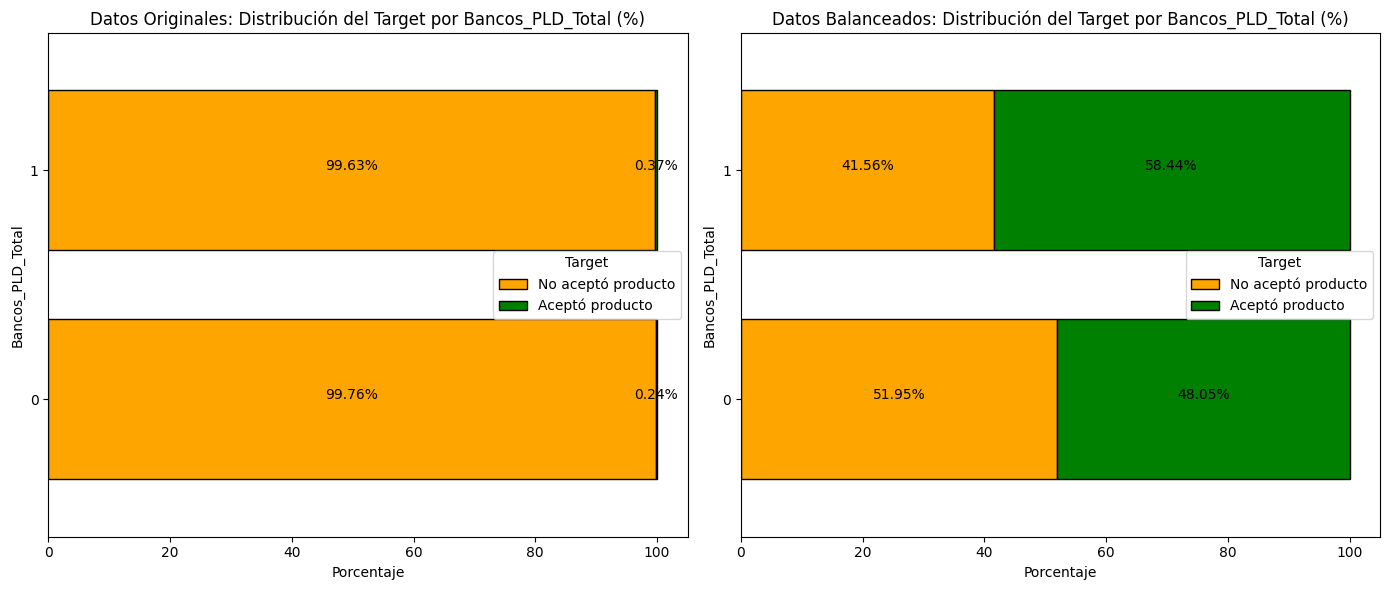

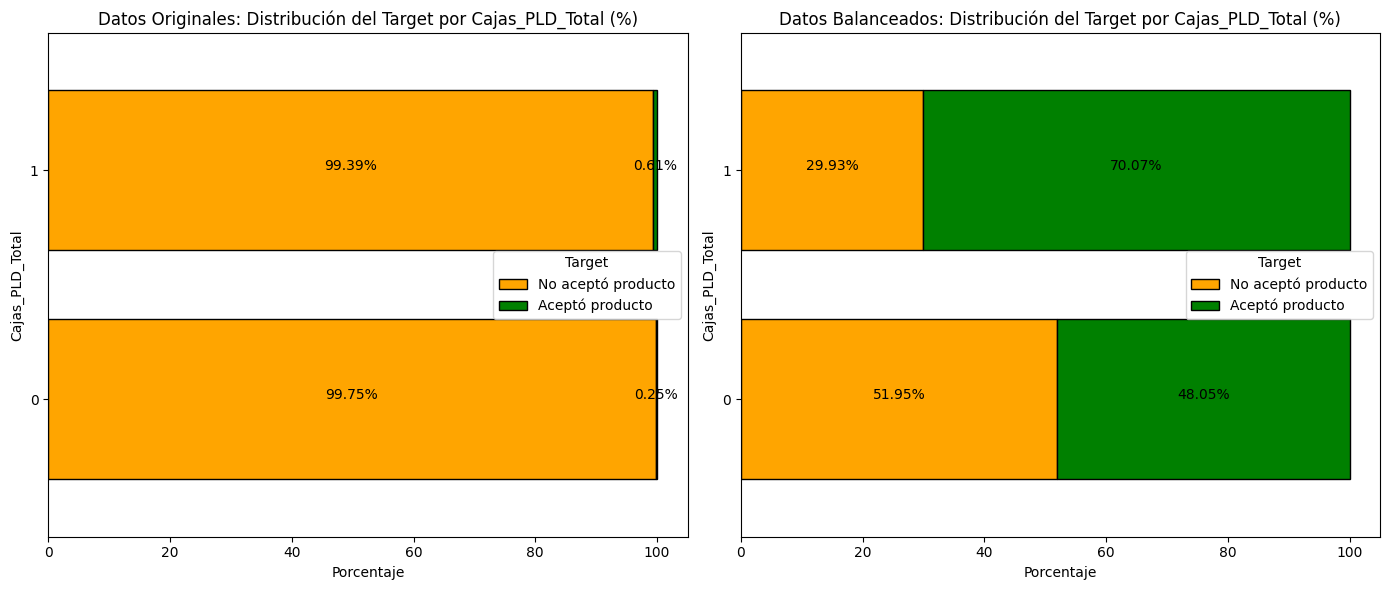

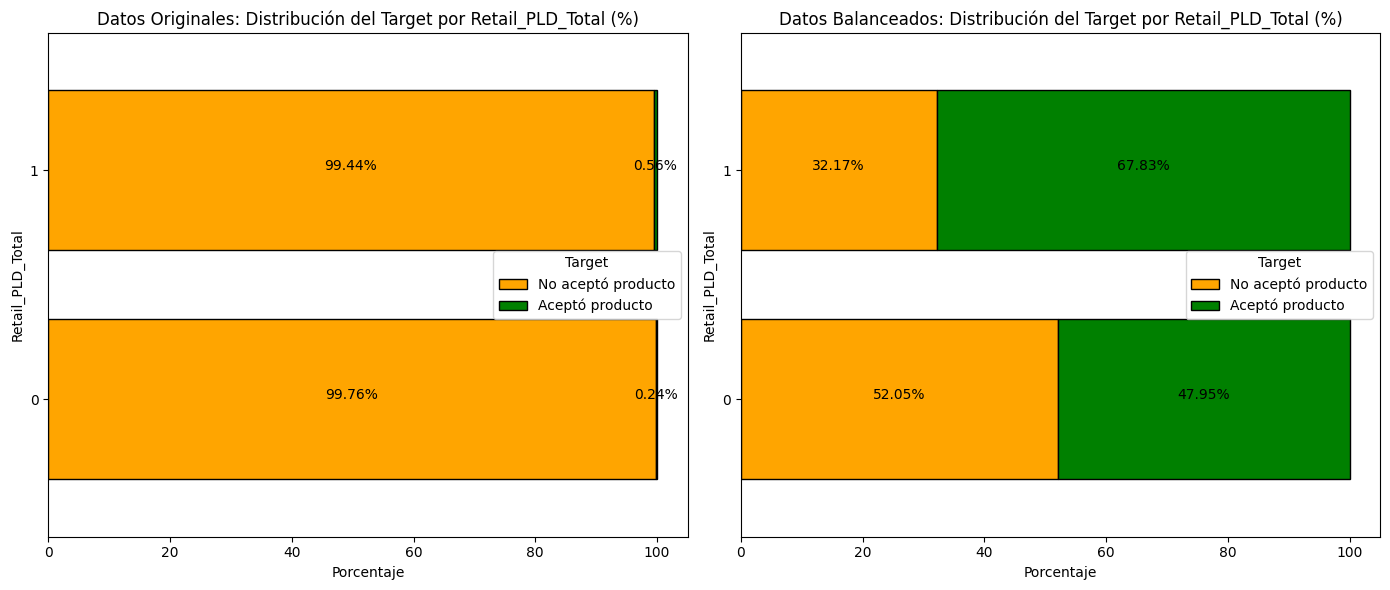

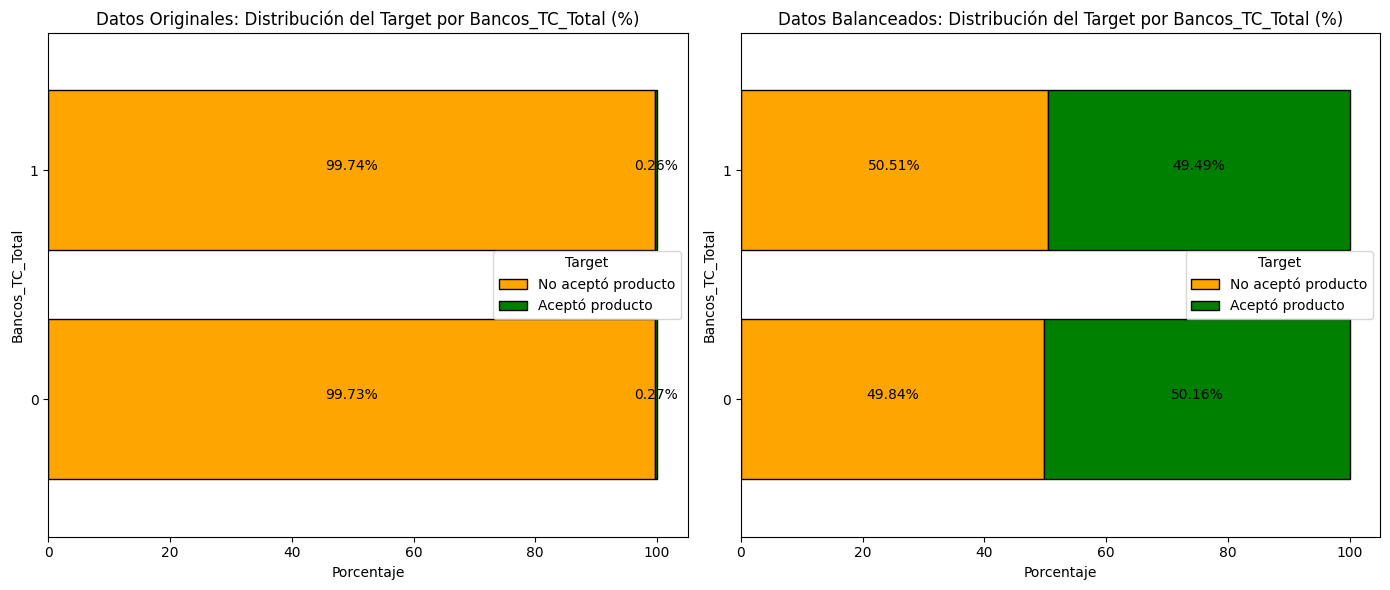

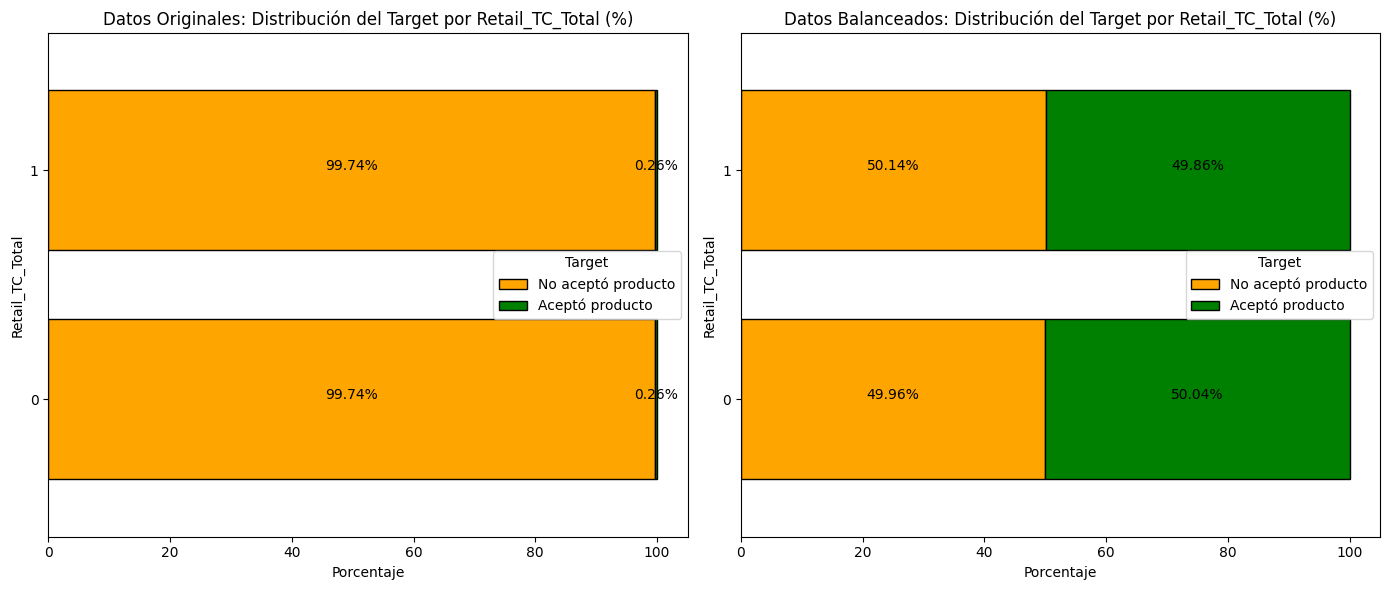

In [263]:
for var in skewed:

    tmp = data.copy()
    tmp_balanced = df_balanced.copy()

    # map the variable values into 0 and 1
    tmp[var] = np.where(data[var]==0, 0, 1)
    tmp_balanced[var] = np.where(tmp_balanced[var]==0, 0, 1)
    

    barras_apiladas_target(tmp, tmp_balanced, var=var, nombres=["Datos Originales", "Datos Balanceados"])

    plt.show()

Parece haber una diferencia en el precio de venta en los valores mapeados, pero los intervalos de confianza se superponen, por lo que probablemente esto no sea significativo ni predictivo.

# Categorical variables

Vamos a analizar las variables categóricas presentes en el conjunto de datos.

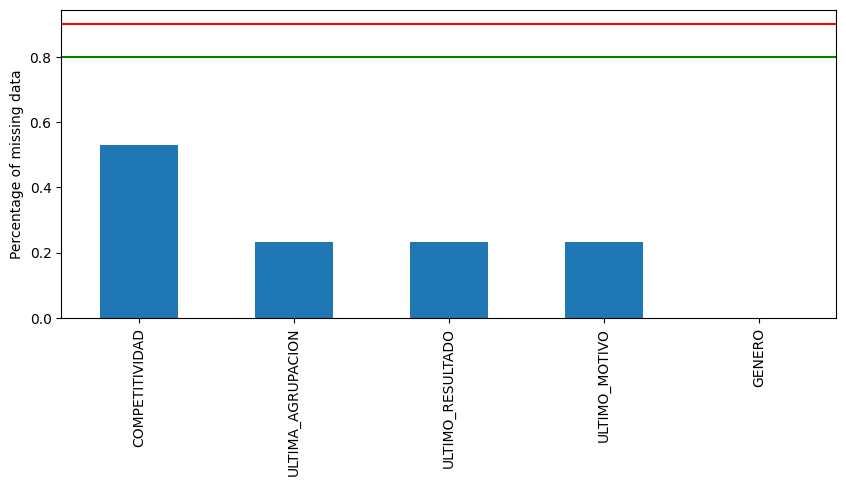

In [264]:
# plot
data[cat_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

In [265]:
print('Numero de Variables Categóricas: ', len(cat_vars))

Numero de Variables Categóricas:  17


In [266]:
import re
# Renombrar columnas eliminando caracteres especiales y reemplazando espacios por "_"

for columna in cat_vars:
    data[columna] = [  "Missing" if col is None else re.sub(r'\W+', '_', col)  for col in data[columna] ]

In [267]:
# let's visualise the values of the categorical variables
data[cat_vars].head()

,MARCA_LABORAL,DEPARTAMENTO,PROVINCIA,DISTRITO_INEI,LIMAS,PROPENSION,MENSAJE_TASA,COMPETITIVIDAD,PRINCIPALIDAD_CONSUMO,MENSAJE_VARIACION,ULTIMA_AGRUPACION,ULTIMO_RESULTADO,ULTIMO_MOTIVO,RANGO_RCI,ESTADO_CIVIL,GENERO,ultima_gestion
555108,2_DEPEN_INDEPEN,LIMA,LIMA,LOS_OLIVOS,LIMA_NORTE,PROPENSION_2,NO_APLICA_A_EXCEPCION_DE_TASA,OFERTA_MAYOR_A_ALGUNA_DEUDA,DEUDA_EN_BANCOS_GRANDES,MISMA_OFERTA,NO_CONTACTO,NO_CONTACTO_MAQUINA,Contestador_Fax,1_0_10_,Soltero,F,NO_GESTIONADO
555109,2_DEPEN_INDEPEN,LIMA,LIMA,BREÑA,LIMA_CENTRO,PROPENSION_2,NO_APLICA_A_EXCEPCION_DE_TASA,OFERTA_MAYOR_A_ALGUNA_DEUDA,DEUDA_EN_BANCOS_GRANDES,CON_MAS_OFERTA,NO_CONTACTO,NO_CONTACTO_MAQUINA,Contestador_Fax,1_0_10_,Soltero,F,NO_CONTACTO
555110,3_INDEPENDIENTE,LIMA,LIMA,SURQUILLO,LIMA_OESTE,PROPENSION_2,NO_APLICA_A_EXCEPCION_DE_TASA,OFERTA_MAYOR_A_ALGUNA_DEUDA,DEUDA_EN_BANCOS_GRANDES,MISMA_OFERTA,NO_CONTACTO,VOLVER_A_INTENTAR,NO_CONTESTAN,1_0_10_,Soltero,F,NO_CONTACTO
555111,2_DEPEN_INDEPEN,SAN_MARTIN,SAN_MARTIN,TARAPOTO,FUERA_DE_LIMA,PROPENSION_1,NO_APLICA_A_EXCEPCION_DE_TASA,OFERTA_MAYOR_A_ALGUNA_DEUDA,DEUDA_EN_BANCOS_GRANDES,NUEVA_OFERTA,NO_CONTACTO,NO_CONTACTO_MAQUINA,Llamada_no_puede_alcanzar_destino,3_20_30_,Soltero,F,NO_GESTIONADO
555112,2_DEPEN_INDEPEN,LIMA,LIMA,SAN_JUAN_DE_LURIGANCHO,LIMA_ESTE,PROPENSION_2,NO_APLICA_A_EXCEPCION_DE_TASA,OFERTA_MAYOR_A_ALGUNA_DEUDA,DEUDA_EN_BANCOS_GRANDES,MISMA_OFERTA,NO_CONTACTO,NO_CONTACTO_MAQUINA,Contestador_Fax,2_10_20_,Soltero,M,NO_GESTIONADO


## Number of labels: cardinality

Evaluemos cuántas categorías diferentes están presentes en cada una de las variables.

<Axes: >

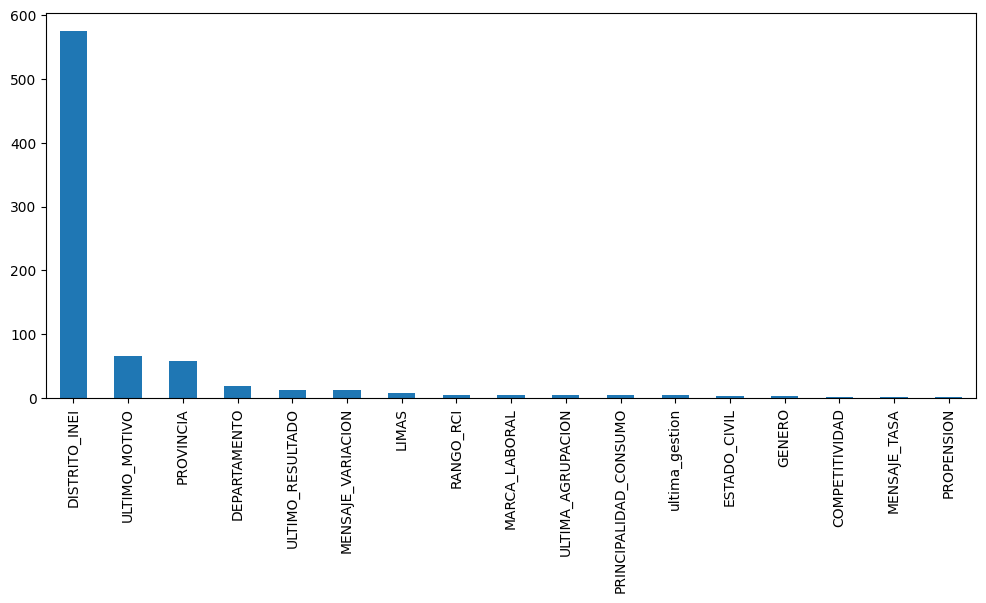

In [268]:
# we count unique categories with pandas unique()
# and then plot them in descending order

data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [269]:
cat_na

['COMPETITIVIDAD',
 'ULTIMA_AGRUPACION',
 'ULTIMO_RESULTADO',
 'ULTIMO_MOTIVO',
 'GENERO']

In [270]:
cat_vars = ['MARCA_LABORAL',
 'LIMAS',
 'PROPENSION',
 'COMPETITIVIDAD',
 'PRINCIPALIDAD_CONSUMO',
 'MENSAJE_VARIACION',
 'ULTIMA_AGRUPACION',
 'RANGO_RCI',
 'ESTADO_CIVIL',
 'GENERO',
 'ultima_gestion']

In [271]:
{x : int(x.split("_")[0]) for x in data["MARCA_LABORAL"].unique()}

{'2_DEPEN_INDEPEN': 2,
 '3_INDEPENDIENTE': 3,
 '1_DEPENDIENTE': 1,
 '4_INFORMAL': 4}

In [174]:
num_na

['veces_acepto_producto',
 'tiempo_desde_ultima_conversion',
 'tiempo_desde_ultima_negacion',
 'intentos_totales',
 'meses_gestionados',
 'dias_ultima_gestion',
 'veces_sin_respuesta',
 'veces_solicitud_seguimiento',
 'promedio_dias_entre_gestiones',
 'max_intentos_en_un_mes',
 'veces_respuesta_positiva',
 'veces_respuesta_negativa']

## Mapeo de Variables Categóricas

In [272]:
map_MARCA_LABORAL = {'2_DEPEN_INDEPEN': 1,
 '3_INDEPENDIENTE': 3,
 '1_DEPENDIENTE': 2,
 '4_INFORMAL': 4}
map_deuda_bancos = {"SIN_DEUDA_CONSUMO": 0 , "DEUDA_EN_CAJAS":3 , "DEUDA_EN_BANCOS_MEDIANOS":2 , "DEUDA_EN_BANCOS_GRANDES":1}
data["MARCA_LABORAL"] = data["MARCA_LABORAL"].map(map_MARCA_LABORAL)
data["PRINCIPALIDAD_CONSUMO"] = data["PRINCIPALIDAD_CONSUMO"].map(map_deuda_bancos)

data["PROPENSION"] = data["PROPENSION"].str.split("_").str[1]
data["RANGO_RCI"] = data["RANGO_RCI"].str.split("_").str[0]
data["ESTADO_CIVIL"] = data["ESTADO_CIVIL"].map({"Soltero":2,"Casado":1,"Missing":0 , "Otro":0})
data["ULTIMA_AGRUPACION"] = data["ULTIMA_AGRUPACION"].map({"NO GESTIONADO": 2 , "NO_CONTACTO": 0 , "CONTACTO_NO_EFECTIVO":1,"CONTACTO_EFECTIVO":1 , "Missing":2})
data["ultima_gestion"] = data["ultima_gestion"].map({"NO_GESTIONADO": 2 ,'Missing':2, "NO_CONTACTO": 0 , "CONTACTO_NO_EFECTIVO":1,"CONTACTO_EFECTIVO":1})
data["GENERO"] = data["GENERO"].map({"F":0,"M":1,"Missing":0})
data["ESTADO_TASA"] = data["MENSAJE_VARIACION"].map(lambda x : 2 if "MENOS_TASA" in x else ( 1 if "MISMA_TASA" in x else ( 3 if "NUEVA" in x else 0 ) ))
data["ESTADO_OFERTA"] = data["MENSAJE_VARIACION"].map(lambda x : 0 if "MENOS_OFERTA" in x else ( 1 if "MISMA_OFERTA" in x else ( 3 if "NUEVA" in x else 2 ) ))
data["NUEVA_OFERTA"] = data["MENSAJE_VARIACION"].map(lambda x : 1 if "NUEVA" in x else 0)
data["COMPETITIVIDAD"] = data["COMPETITIVIDAD"].map(lambda x : 0 if x =='Missing' else 1)

In [273]:
cat_vars= ['MARCA_LABORAL',
 
 'PROPENSION',
 'COMPETITIVIDAD',
 'PRINCIPALIDAD_CONSUMO',
 'ULTIMA_AGRUPACION',
 
 'ESTADO_CIVIL',
 'GENERO',
 'ultima_gestion',
          'RANGO_RCI','LIMAS'] + ["ESTADO_TASA","ESTADO_OFERTA","NUEVA_OFERTA"]

In [274]:
df_balanced = balanced_resampling(data, fact =  1, replace=True)


Distribución después del balanceo: Counter({0.0: 210940, 1.0: 210940})


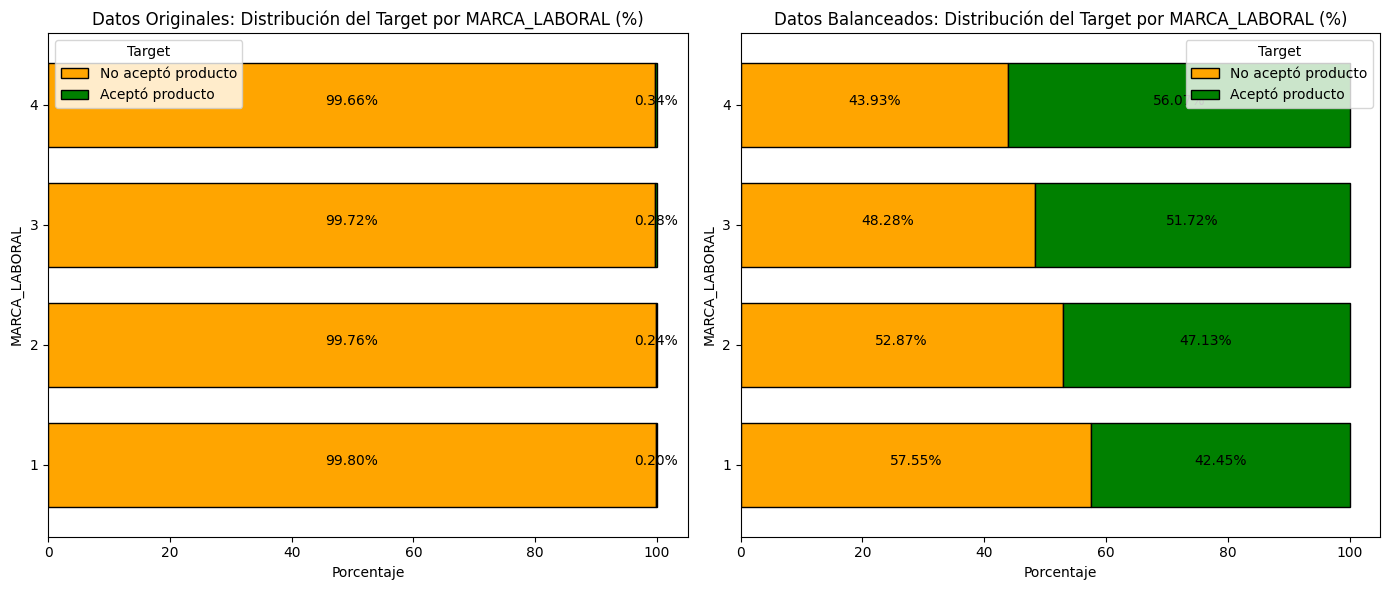

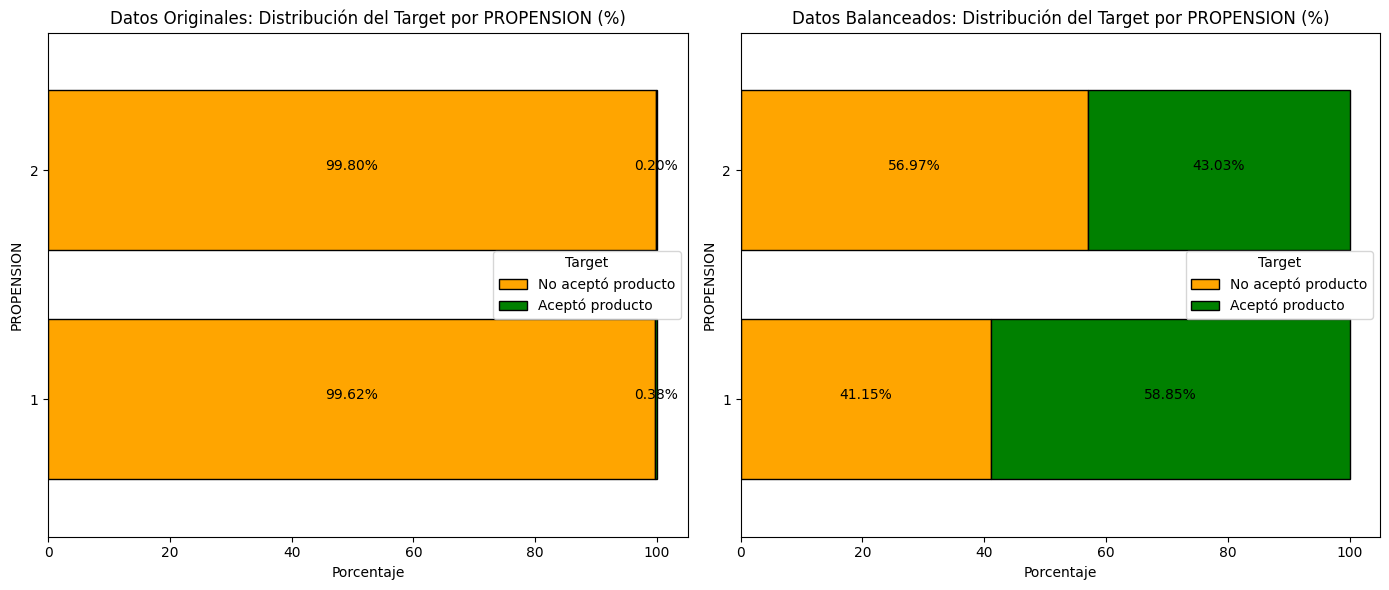

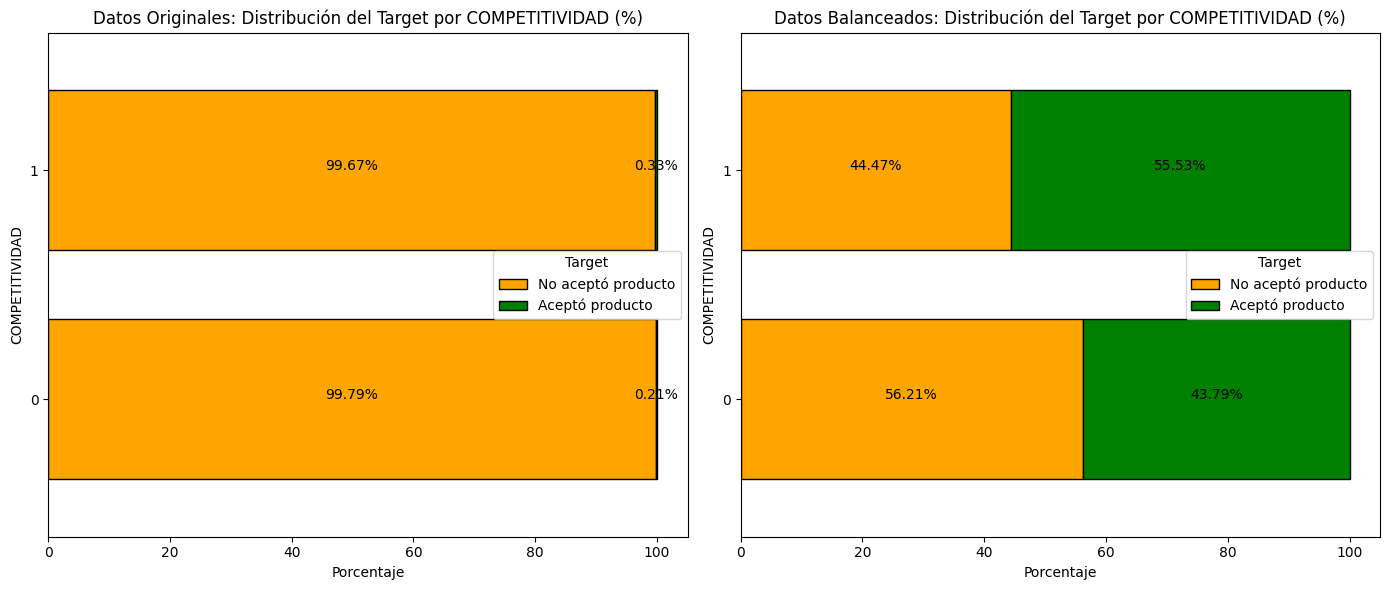

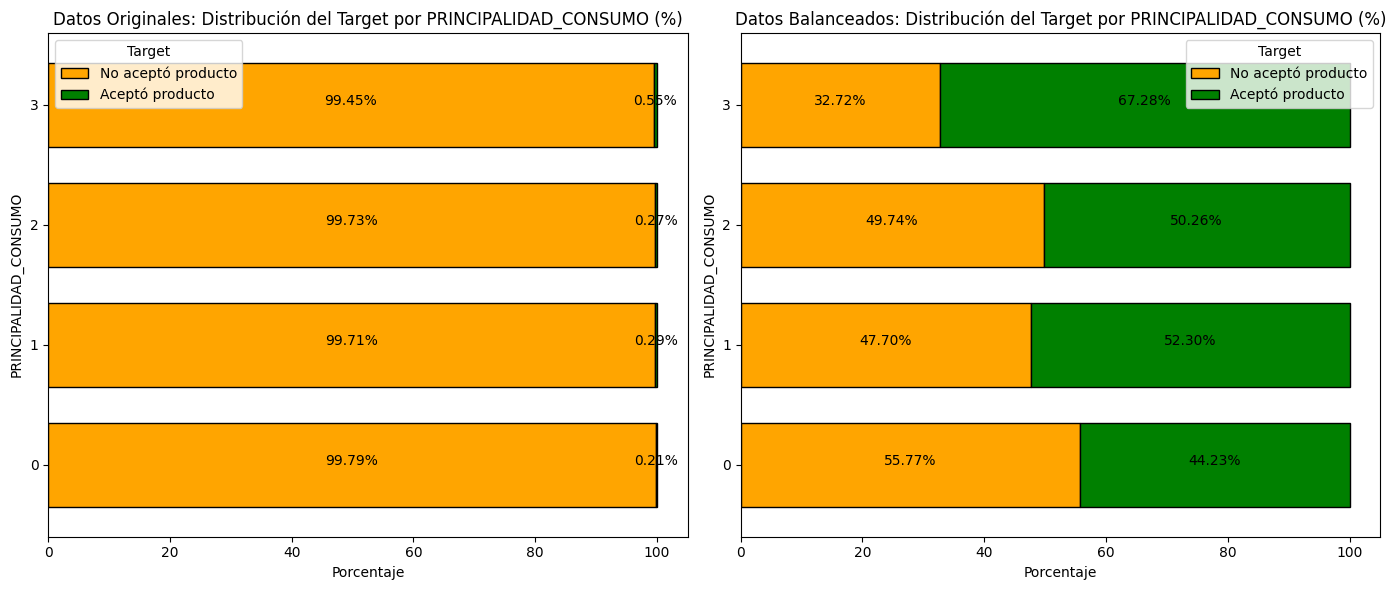

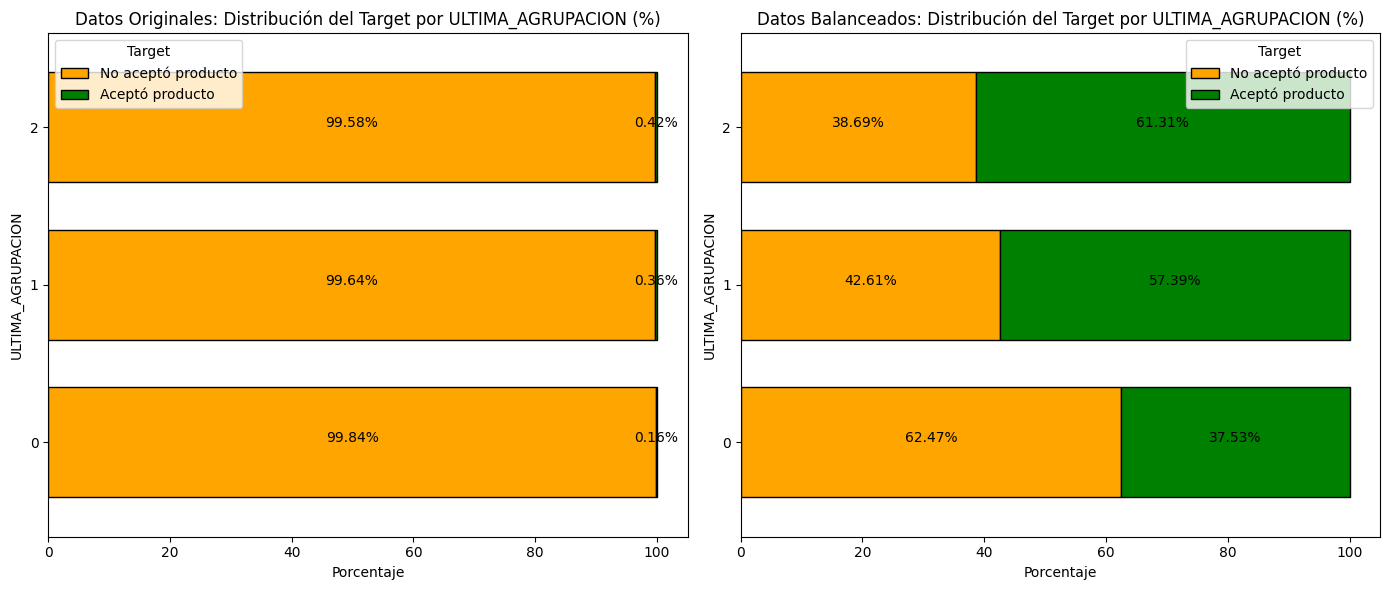

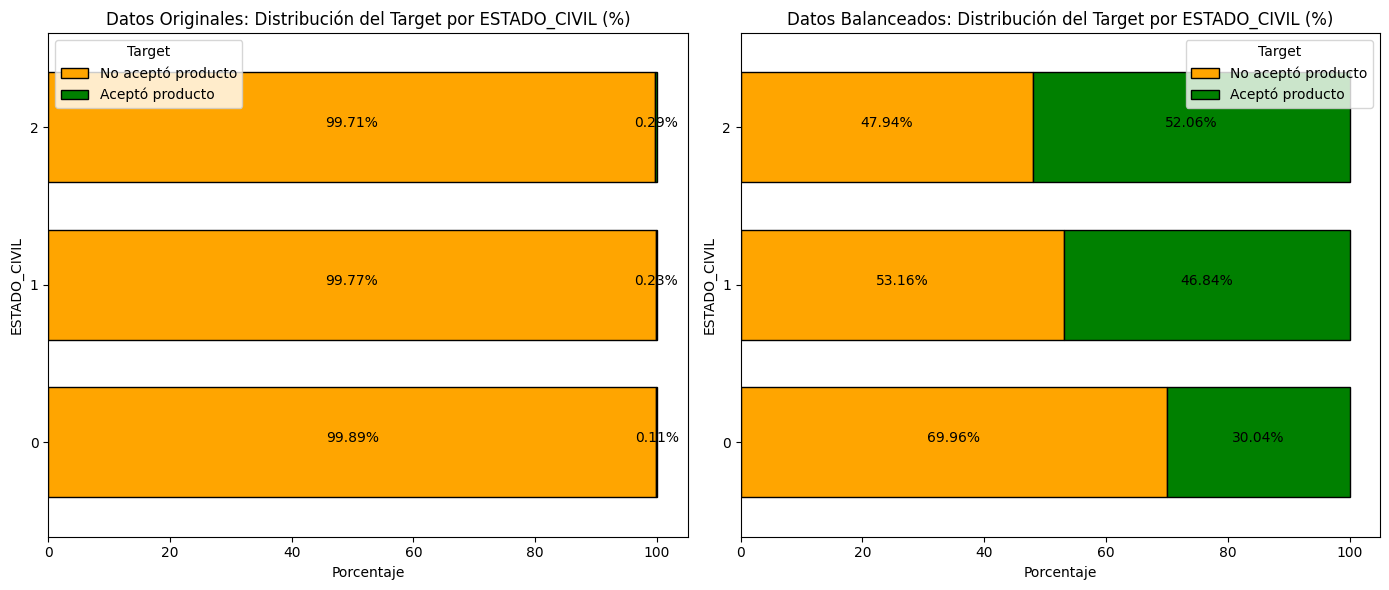

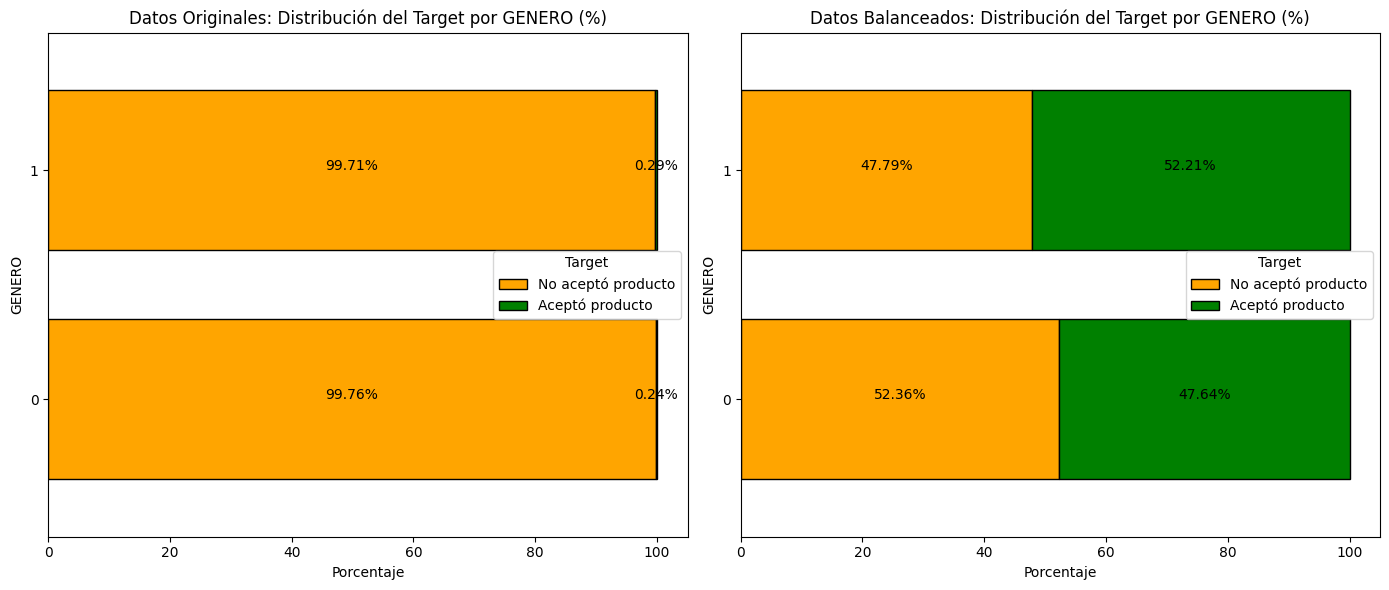

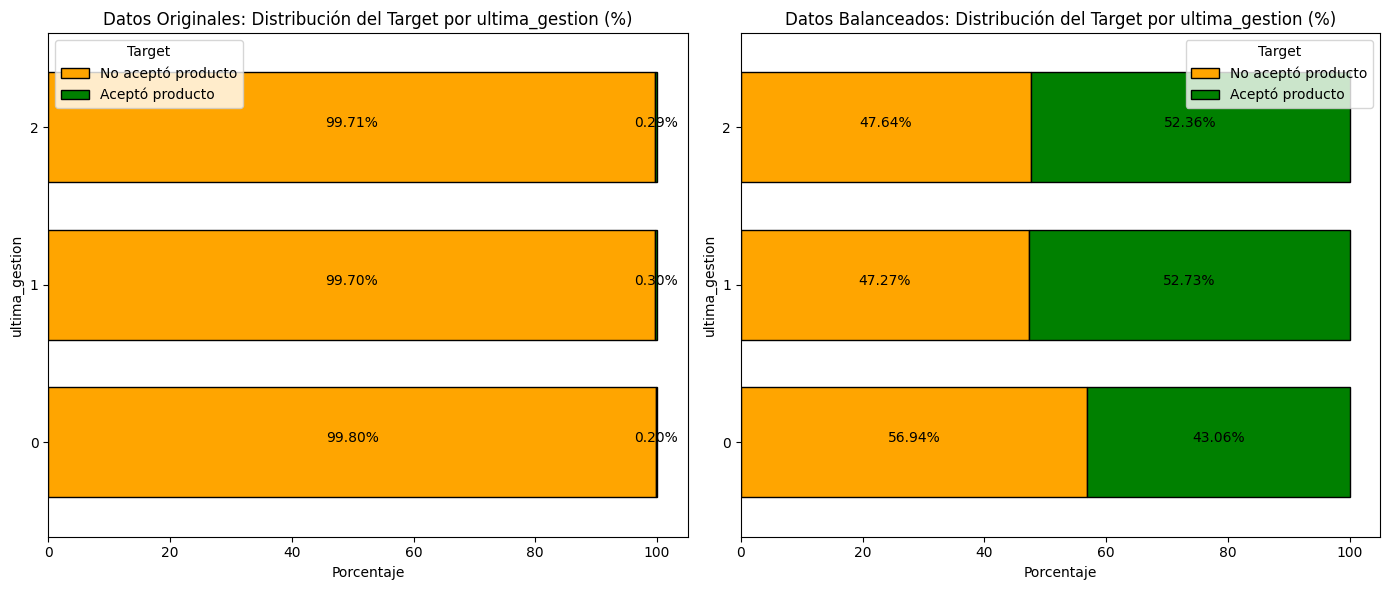

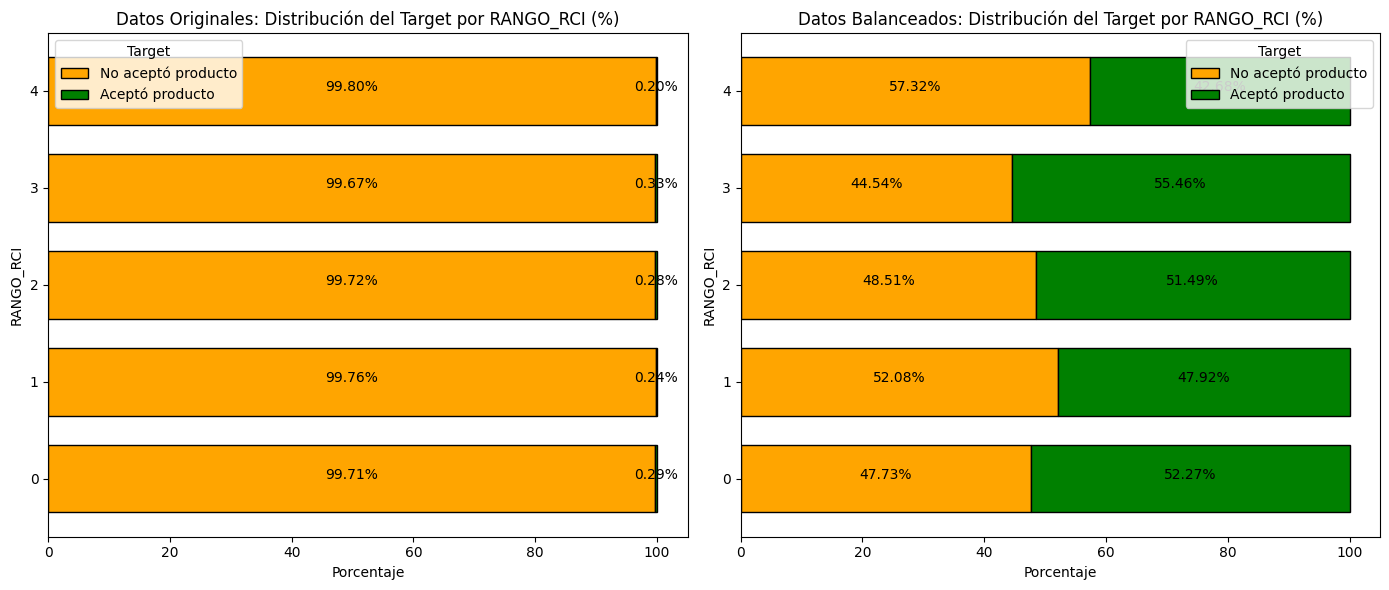

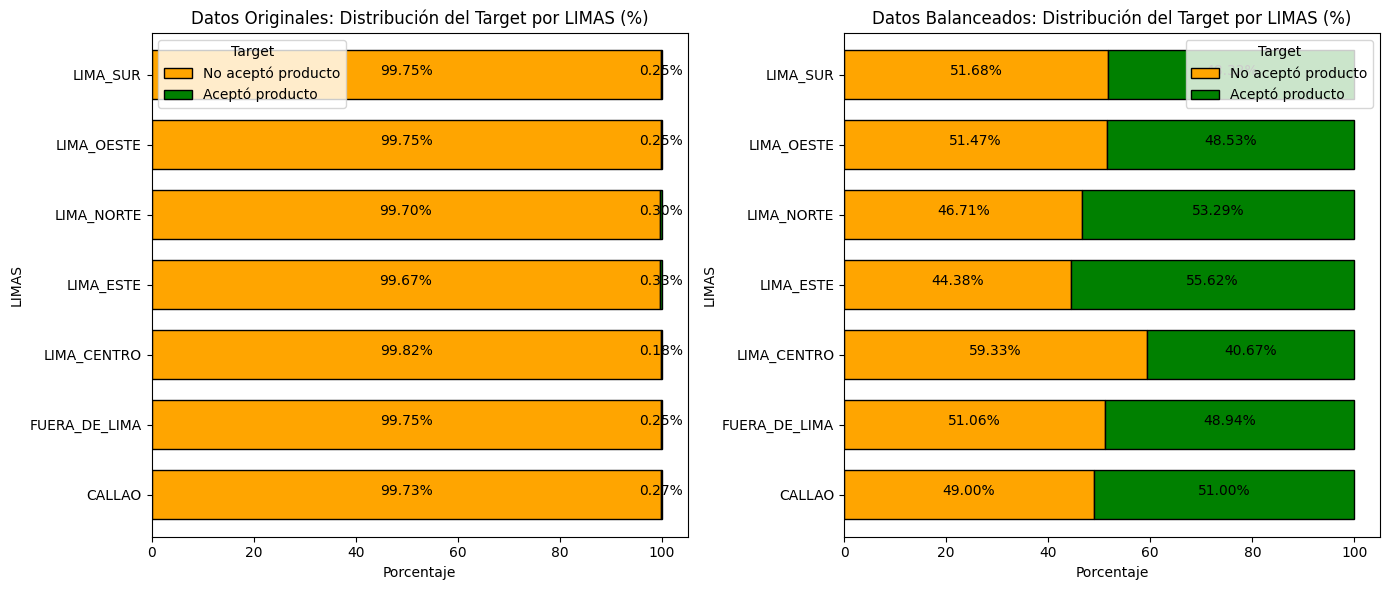

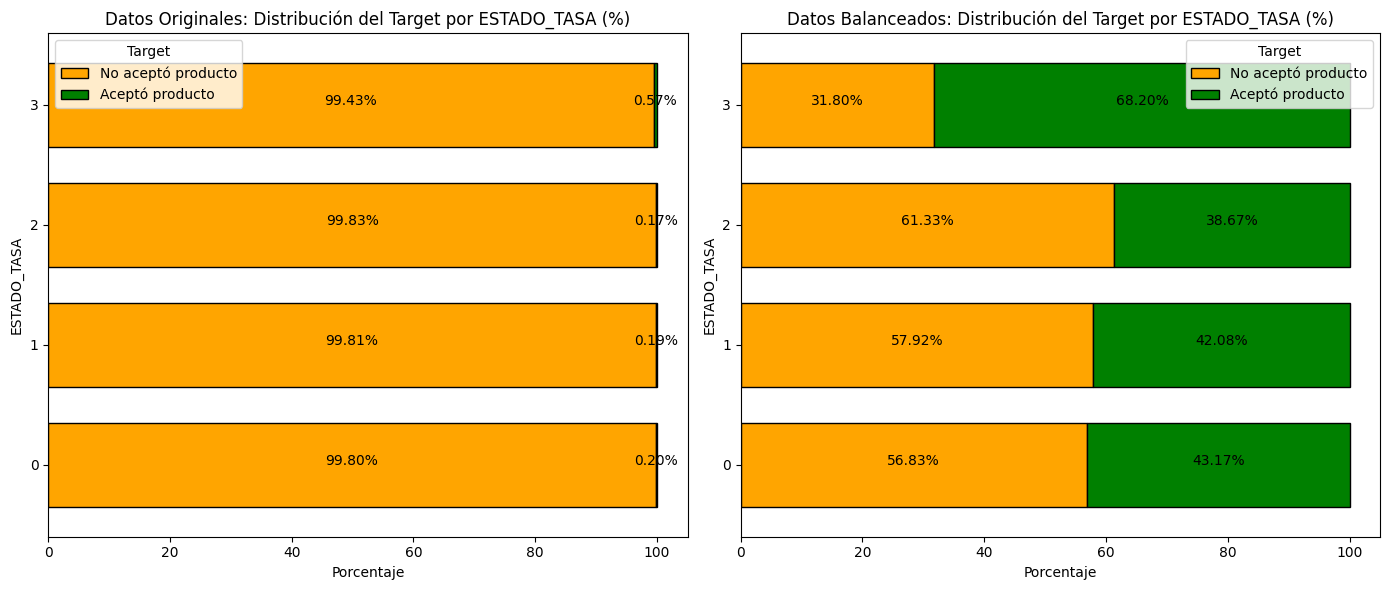

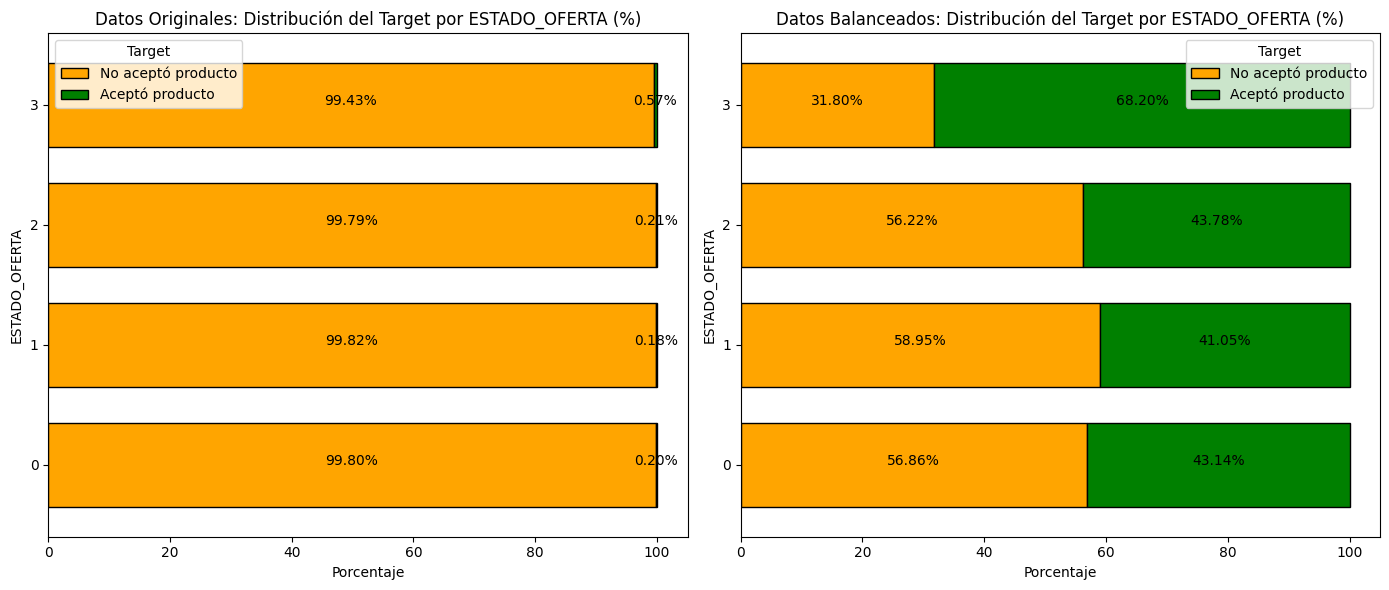

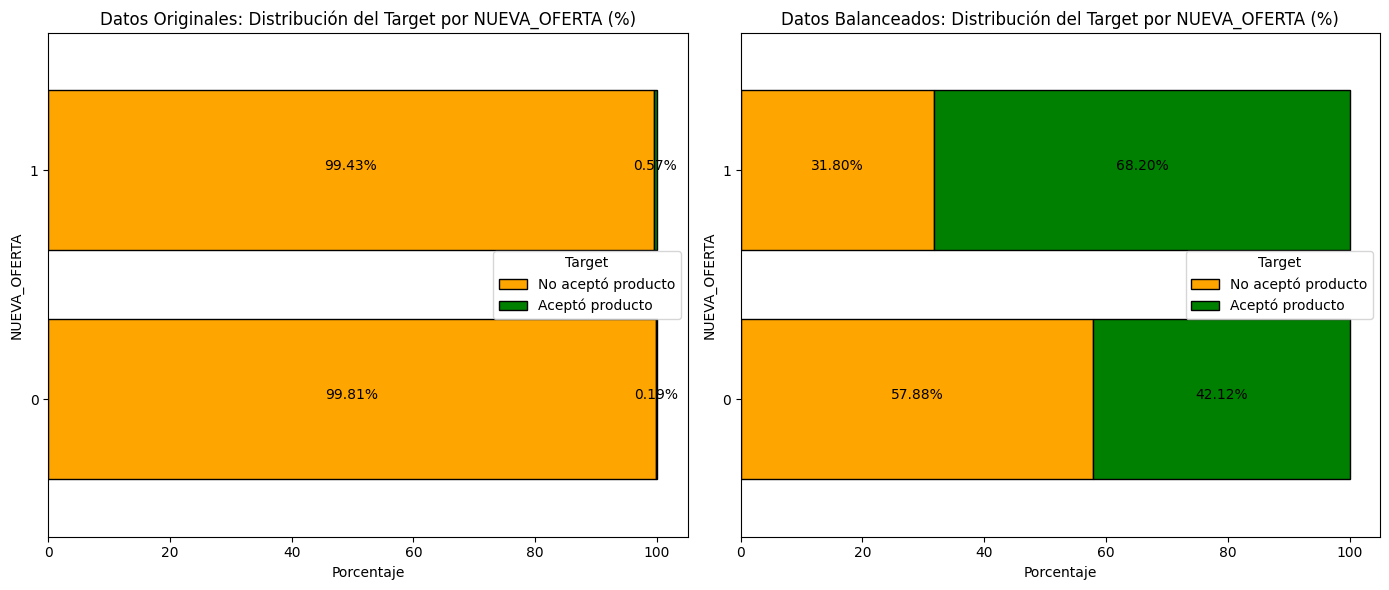

In [275]:
for var in cat_vars:

    tmp = data.copy()
    tmp_balanced = df_balanced.copy()
    barras_apiladas_target(tmp, tmp_balanced, var=var, nombres=["Datos Originales", "Datos Balanceados"])

    plt.show()